特徴量の取捨選択を行う

In [1]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
import gc
import pickle
import matplotlib.pyplot as plt

gc.enable()

dtypes = {
    'MachineIdentifier':                                    'object',
    'ProductName':                                          'object',
    'EngineVersion':                                        'object',
    'AppVersion':                                           'object',
    'AvSigVersion':                                         'object',
    'IsBeta':                                               'int8',
    'RtpStateBitfield':                                     'float16',
    'IsSxsPassiveMode':                                     'int8',
    'DefaultBrowsersIdentifier':                            'float32',  # was 'float16'
    'AVProductStatesIdentifier':                            'float32',
    'AVProductsInstalled':                                  'float16',
    'AVProductsEnabled':                                    'float16',
    'HasTpm':                                               'int8',
    'CountryIdentifier':                                    'int16',
    'CityIdentifier':                                       'float32',
    'OrganizationIdentifier':                               'float16',
    'GeoNameIdentifier':                                    'float16',
    'LocaleEnglishNameIdentifier':                          'int16',  # was 'int8'
    'Platform':                                             'object',
    'Processor':                                            'object',
    'OsVer':                                                'object',
    'OsBuild':                                              'int16',
    'OsSuite':                                              'int16',
    'OsPlatformSubRelease':                                 'object',
    'OsBuildLab':                                           'object',
    'SkuEdition':                                           'object',
    'IsProtected':                                          'float16',
    'AutoSampleOptIn':                                      'int8',
    'PuaMode':                                              'object',
    'SMode':                                                'float16',
    'IeVerIdentifier':                                      'float16',
    'SmartScreen':                                          'object',
    'Firewall':                                             'float16',
    'UacLuaenable':                                         'float64', # was 'float32'
    'Census_MDC2FormFactor':                                'object',
    'Census_DeviceFamily':                                  'object',
    'Census_OEMNameIdentifier':                             'float32', # was 'float16'
    'Census_OEMModelIdentifier':                            'float32',
    'Census_ProcessorCoreCount':                            'float16',
    'Census_ProcessorManufacturerIdentifier':               'float16',
    'Census_ProcessorModelIdentifier':                      'float32', # was 'float16'
    'Census_ProcessorClass':                                'object',
    'Census_PrimaryDiskTotalCapacity':                      'float64', # was 'float32'
    'Census_PrimaryDiskTypeName':                           'object',
    'Census_SystemVolumeTotalCapacity':                     'float64', # was 'float32'
    'Census_HasOpticalDiskDrive':                           'int8',
    'Census_TotalPhysicalRAM':                              'float32',
    'Census_ChassisTypeName':                               'object',
    'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float32', # was 'float16'
    'Census_InternalPrimaryDisplayResolutionHorizontal':    'float32', # was 'float16'
    'Census_InternalPrimaryDisplayResolutionVertical':      'float32', # was 'float16'
    'Census_PowerPlatformRoleName':                         'object',
    'Census_InternalBatteryType':                           'object',
    'Census_InternalBatteryNumberOfCharges':                'float64', # was 'float32'
    'Census_OSVersion':                                     'object',
    'Census_OSArchitecture':                                'object',
    'Census_OSBranch':                                      'object',
    'Census_OSBuildNumber':                                 'int16',
    'Census_OSBuildRevision':                               'int32',
    'Census_OSEdition':                                     'object',
    'Census_OSSkuName':                                     'object',
    'Census_OSInstallTypeName':                             'object',
    'Census_OSInstallLanguageIdentifier':                   'float16',
    'Census_OSUILocaleIdentifier':                          'int16',
    'Census_OSWUAutoUpdateOptionsName':                     'object',
    'Census_IsPortableOperatingSystem':                     'int8',
    'Census_GenuineStateName':                              'object',
    'Census_ActivationChannel':                             'object',
    'Census_IsFlightingInternal':                           'float16',
    'Census_IsFlightsDisabled':                             'float16',
    'Census_FlightRing':                                    'object',
    'Census_ThresholdOptIn':                                'float16',
    'Census_FirmwareManufacturerIdentifier':                'float16',
    'Census_FirmwareVersionIdentifier':                     'float32',
    'Census_IsSecureBootEnabled':                           'int8',
    'Census_IsWIMBootEnabled':                              'float16',
    'Census_IsVirtualDevice':                               'float16',
    'Census_IsTouchEnabled':                                'int8',
    'Census_IsPenCapable':                                  'int8',
    'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
    'Wdft_IsGamer':                                         'float16',
    'Wdft_RegionIdentifier':                                'float16',
    'HasDetections':                                        'float32',
    }

In [2]:
#データ読みこみ
with open('/home/um003580/code/03072/train_preprocess3.csv.pkl','rb') as f:
  train = pickle.load(f)
with open('/home/um003580/code/03072/test_preprocess3.csv.pkl','rb') as f:
  test = pickle.load(f)

In [5]:
train.head()

ProductName EngineVersion AppVersion AvSigVersion IsBeta RtpStateBitfield  \
0           5             0          0            0      1                7   
1           5            57         30         6465      1                7   
2           5             0          0            0      1                7   
3           5             0          0            0      1                7   
4           5             0          0            0      1                7   

  IsSxsPassiveMode DefaultBrowsersIdentifier AVProductStatesIdentifier  \
0                1                      2610                     26978   
1                1                      2610                     26978   
2                1                      2610                     26978   
3                1                      2610                     26978   
4                1                      2610                     26978   

  AVProductsInstalled        ...        Census_OSVersion3 Census_OSVersion4  \
0                   2        ...                    17134                 0   
1                   2        ...                    17134                 1   
2                   2        ...                    17134                 0   
3                   2        ...                    17134                 0   
4                   2        ...                    17134                 0   

  OsBuildLab_1 OsBuildLab_2 OsBuildLab_3 OsBuildLab_4 OsBuildLab_5_1  \
0           35            2            2           17            230   
1           35            2            2           17            230   
2           35            2            2           17            230   
3           35            2            2           17            230   
4           35            2            2           17            230   

  OsBuildLab_5_2 HasDetections MachineIdentifier  
0            180           0.0                 0  
1            180           0.0                 1  
2            180           0.0                 2  
3            180           1.0                 3  
4            180           1.0                 4  

[5 rows x 100 columns]

In [3]:
with open('/home/um003580/code/03052/train_index.pkl','rb') as f:
  train_index = pickle.load(f)
with open('/home/um003580/code/03052/valid_index.pkl','rb') as f:
  valid_index = pickle.load(f)

In [4]:
# cpmp_auc
from numba import jit

@jit
def fast_auc(y_true, y_prob):
    y_true = np.asarray(y_true)
    y_true = y_true[np.argsort(y_prob)]
    nfalse = 0
    auc = 0
    n = len(y_true)
    for i in range(n):
        y_i = y_true[i]
        nfalse += (1 - y_i)
        auc += y_i * nfalse
    auc /= (nfalse * (n - nfalse))
    return auc

def eval_auc(preds, dtrain):
    labels = dtrain.get_label()
    return 'auc', fast_auc(labels, preds), True

In [39]:
# 以下は除去しても全くスコアが変わらなかった
same_features = [c for c in train.columns if train[c].nunique() == 1]
same_features

['EngineVersion1',
 'EngineVersion2',
 'AppVersion1',
 'AvSigVersion4',
 'Census_OSVersion2']

In [62]:
for i in same_features:
    del train[i]
    del test[i]

In [63]:
train.head()

ProductName EngineVersion AppVersion AvSigVersion IsBeta RtpStateBitfield  \
0           5             0          0            0      1                7   
1           5            57         30         6465      1                7   
2           5             0          0            0      1                7   
3           5             0          0            0      1                7   
4           5             0          0            0      1                7   

  IsSxsPassiveMode DefaultBrowsersIdentifier AVProductStatesIdentifier  \
0                1                      2610                     26978   
1                1                      2610                     26978   
2                1                      2610                     26978   
3                1                      2610                     26978   
4                1                      2610                     26978   

  AVProductsInstalled        ...        Census_OSVersion3 Census_OSVersion4  \
0                   2        ...                    17134                 0   
1                   2        ...                    17134                 1   
2                   2        ...                    17134                 0   
3                   2        ...                    17134                 0   
4                   2        ...                    17134                 0   

  OsBuildLab_1 OsBuildLab_2 OsBuildLab_3 OsBuildLab_4 OsBuildLab_5_1  \
0           35            2            2           17            230   
1           35            2            2           17            230   
2           35            2            2           17            230   
3           35            2            2           17            230   
4           35            2            2           17            230   

  OsBuildLab_5_2 HasDetections MachineIdentifier  
0            180           0.0                 0  
1            180           0.0                 1  
2            180           0.0                 2  
3            180           1.0                 3  
4            180           1.0                 4  

[5 rows x 100 columns]

In [64]:
# 保存
with open('/home/um003580/code/03072/train_preprocess3.csv.pkl', 'wb') as f:
    pickle.dump(train, f, protocol=4)
with open('/home/um003580/code/03072/test_preprocess3.csv.pkl', 'wb') as f:
    pickle.dump(test, f, protocol=4)

In [41]:
obl = ['OsBuildLab_1','OsBuildLab_2','OsBuildLab_3','OsBuildLab_4','OsBuildLab_5_1','OsBuildLab_5_2']
cols = [x for x in X_fit.columns if x not in same_features]
cols = [x for x in cols if x not in obl]
len(cols)

92

In [42]:
# eiminate os build features
param = {
    'max_depth': -1,
#     'n_estimatodrs': 30000,
    'learning_rate': 0.1,
    'colsample_bytree': 0.2,
    'objective': 'binary',
    'n_jobs': -1,
    'importance_type': 'gain',
#     "metric": 'auc'
    'metric': 'None'
}
trn_data = lgb.Dataset(X_fit[cols],
                       label=y_fit,
#                        categorical_feature = categorical_columns
                      )
val_data = lgb.Dataset(X_val[cols],
                       label=y_val,
#                        categorical_feature = categorical_columns
                      )

num_round = 10000
clf = lgb.train(param,
                trn_data,
                num_round,
                valid_sets = [val_data],
                verbose_eval = 20,
                early_stopping_rounds = 100,
                feval=eval_auc)

Training until validation scores don't improve for 100 rounds.
[20]	valid_0's auc: 0.693716
[40]	valid_0's auc: 0.697311
[60]	valid_0's auc: 0.701092
[80]	valid_0's auc: 0.704293
[100]	valid_0's auc: 0.706277
[120]	valid_0's auc: 0.707964
[140]	valid_0's auc: 0.709152
[160]	valid_0's auc: 0.709789
[180]	valid_0's auc: 0.710291
[200]	valid_0's auc: 0.710602
[220]	valid_0's auc: 0.710988
[240]	valid_0's auc: 0.71119
[260]	valid_0's auc: 0.711361
[280]	valid_0's auc: 0.711678
[300]	valid_0's auc: 0.71208
[320]	valid_0's auc: 0.712387
[340]	valid_0's auc: 0.712567
[360]	valid_0's auc: 0.712697
[380]	valid_0's auc: 0.712794
[400]	valid_0's auc: 0.712825
[420]	valid_0's auc: 0.712993
[440]	valid_0's auc: 0.713135
[460]	valid_0's auc: 0.713034
[480]	valid_0's auc: 0.713121
[500]	valid_0's auc: 0.712894
[520]	valid_0's auc: 0.71302
[540]	valid_0's auc: 0.713107
[560]	valid_0's auc: 0.713104
[580]	valid_0's auc: 0.713144
Early stopping, best iteration is:
[493]	valid_0's auc: 0.71321


os_buildlab_featuresぬいたらスコア少しさがった

Text(0.5, 1.0, 'Light GBM Feature Importance(gain)')

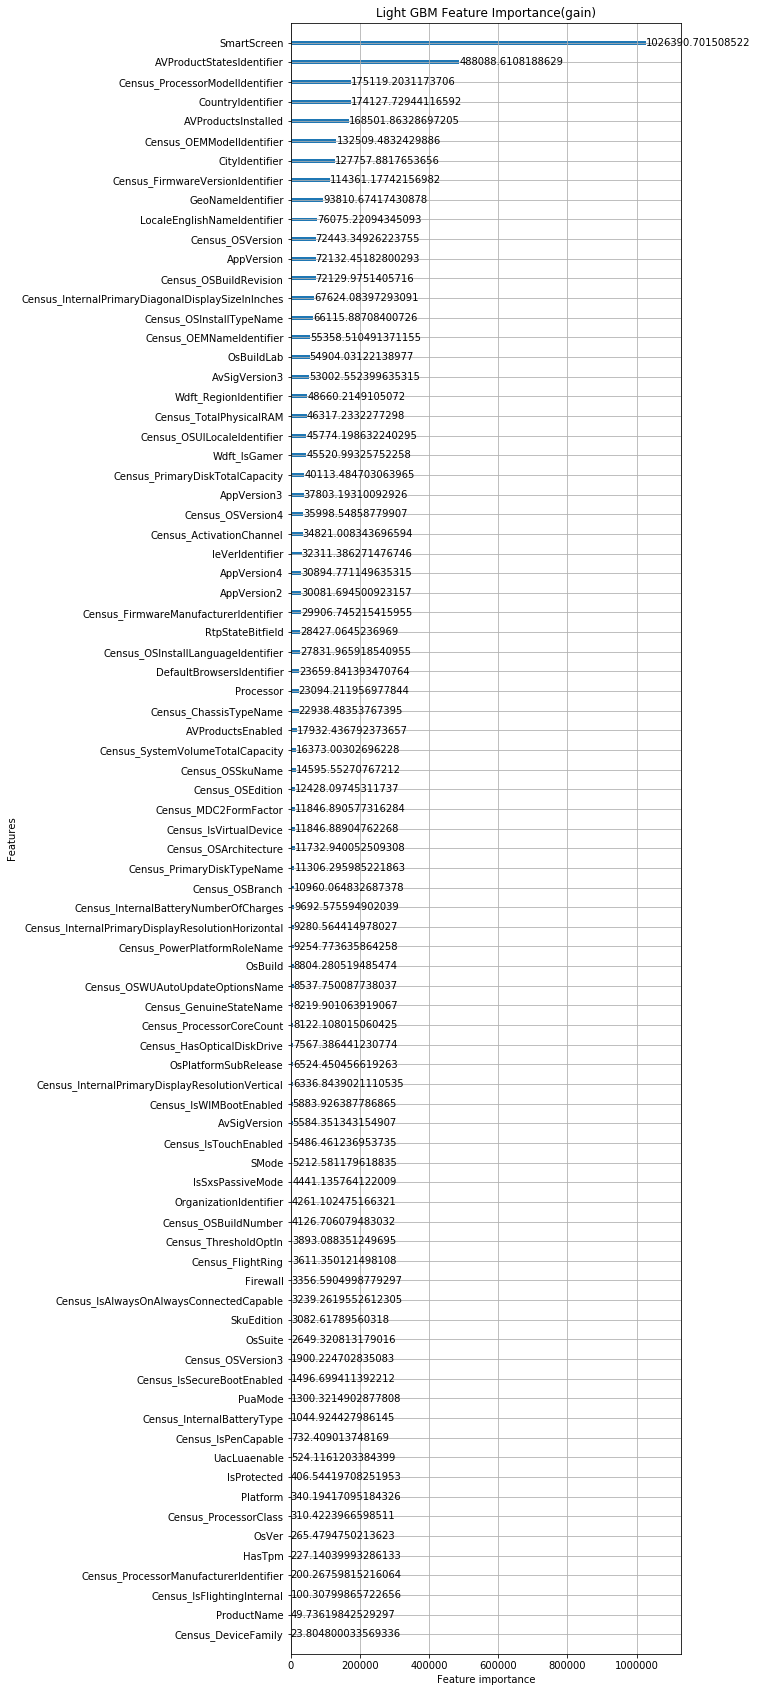

In [53]:
# feature importance
f, ax = plt.subplots(figsize=[7, 30])
lgb.plot_importance(clf, max_num_features=300, ax=ax, importance_type='gain')
plt.title("Light GBM Feature Importance(gain)")

In [ ]:
plt.savefig('feature_importance.png')

In [6]:
with open('/home/um003580/code/03062/train_count.csv.pkl','rb') as f:
  train_count = pickle.load(f)
with open('/home/um003580/code/03062/test_count.csv.pkl','rb') as f:
  test_count = pickle.load(f)

In [56]:
train.head()

ProductName EngineVersion AppVersion AvSigVersion IsBeta RtpStateBitfield  \
0           5             0          0            0      1                7   
1           5            57         30         6465      1                7   
2           5             0          0            0      1                7   
3           5             0          0            0      1                7   
4           5             0          0            0      1                7   

  IsSxsPassiveMode DefaultBrowsersIdentifier AVProductStatesIdentifier  \
0                1                      2610                     26978   
1                1                      2610                     26978   
2                1                      2610                     26978   
3                1                      2610                     26978   
4                1                      2610                     26978   

  AVProductsInstalled      ...      Census_OSVersion2 Census_OSVersion3  \
0                   2      ...                      0             17134   
1                   2      ...                      0             17134   
2                   2      ...                      0             17134   
3                   2      ...                      0             17134   
4                   2      ...                      0             17134   

  Census_OSVersion4 OsBuildLab_1 OsBuildLab_2 OsBuildLab_3 OsBuildLab_4  \
0                 0           35            2            2           17   
1                 1           35            2            2           17   
2                 0           35            2            2           17   
3                 0           35            2            2           17   
4                 0           35            2            2           17   

  OsBuildLab_5_1 OsBuildLab_5_2 HasDetections  
0            230            180           0.0  
1            230            180           0.0  
2            230            180           0.0  
3            230            180           1.0  
4            230            180           1.0  

[5 rows x 104 columns]

In [58]:
train_count.head()

ProductName_count  EngineVersion_count  AppVersion_count  \
0           16623765              3833951           5824824   
1           16623765               299099            488387   
2           16623765              3833951           5824824   
3           16623765              3833951           5824824   
4           16623765              3833951           5824824   

   AvSigVersion_count  IsBeta_count  RtpStateBitfield_count  \
0               20117      16774623              16270542.0   
1              230648      16774623              16270542.0   
2               10485      16774623              16270542.0   
3               41940      16774623              16270542.0   
4               50449      16774623              16270542.0   

   IsSxsPassiveMode_count  DefaultBrowsersIdentifier_count  \
0                16495477                              NaN   
1                16495477                              NaN   
2                16495477                              NaN   
3                16495477                              NaN   
4                16495477                              NaN   

   AVProductStatesIdentifier_count  AVProductsInstalled_count      ...        \
0                       11333187.0                 12058502.0      ...         
1                       11333187.0                 12058502.0      ...         
2                       11333187.0                 12058502.0      ...         
3                       11333187.0                 12058502.0      ...         
4                       11333187.0                 12058502.0      ...         

   Census_OSVersion3_count  Census_OSVersion4_count  OsBuildLab_1_count  \
0                  7987759                   959932             7808674   
1                  7987759                   285590             7808674   
2                  7987759                   959932             7808674   
3                  7987759                  1565473             7808674   
4                  7987759                   252155             7808674   

   OsBuildLab_2_count  OsBuildLab_3_count  OsBuildLab_4_count  \
0             8099217            15278759             7808682   
1             8099217            15278759             7808682   
2             8099217            15278759             7808682   
3             8099217            15278759             7808682   
4             8099217            15278759             7808682   

   OsBuildLab_5_1_count  OsBuildLab_5_2_count  MachineIdentifier  \
0               7819574               7814547                  0   
1               7819574               7814547                  1   
2               7819574               7814547                  2   
3               7819574               7814547                  3   
4               7819574               7814547                  4   

   HasDetections  
0            0.0  
1            0.0  
2            0.0  
3            1.0  
4            1.0  

[5 rows x 105 columns]

In [59]:
train['MachineIdentifier'] = train.index
test['MachineIdentifier'] = test.index

In [78]:
train_count['MachineIdentifier'] = train_count['MachineIdentifier'].astype('int64')
test_count['MachineIdentifier'] = test_count['MachineIdentifier'].astype('int64')

In [77]:
same_features = [c for c in train_count.columns if train_count[c].nunique() == 1]
same_features

['EngineVersion1_count',
 'EngineVersion2_count',
 'AppVersion1_count',
 'AvSigVersion4_count']

In [79]:
for i in same_features:
    del train_count[i], test_count[i]

In [107]:
# 保存
with open('/home/um003580/code/03062/train_count.csv.pkl', 'wb') as f:
    pickle.dump(train_count, f, protocol=4)
with open('/home/um003580/code/03062/test_count.csv.pkl', 'wb') as f:
    pickle.dump(test_count, f, protocol=4)

In [7]:
train = pd.merge(train, train_count, on='MachineIdentifier', how='left')
test = pd.merge(test, test_count, on='MachineIdentifier', how='left')

In [87]:
del train['HasDetections_y']

In [88]:
train['HasDetections'] = train['HasDetections_x']
del train['HasDetections_x']

In [8]:
train.head()

ProductName EngineVersion AppVersion AvSigVersion IsBeta RtpStateBitfield  \
0           5             0          0            0      1                7   
1           5            57         30         6465      1                7   
2           5             0          0            0      1                7   
3           5             0          0            0      1                7   
4           5             0          0            0      1                7   

  IsSxsPassiveMode DefaultBrowsersIdentifier AVProductStatesIdentifier  \
0                1                      2610                     26978   
1                1                      2610                     26978   
2                1                      2610                     26978   
3                1                      2610                     26978   
4                1                      2610                     26978   

  AVProductsInstalled         ...          Census_OSVersion1_count  \
0                   2         ...                         16774689   
1                   2         ...                         16774689   
2                   2         ...                         16774689   
3                   2         ...                         16774689   
4                   2         ...                         16774689   

  Census_OSVersion2_count Census_OSVersion3_count Census_OSVersion4_count  \
0                16774689                 7987759                  959932   
1                16774689                 7987759                  285590   
2                16774689                 7987759                  959932   
3                16774689                 7987759                 1565473   
4                16774689                 7987759                  252155   

  OsBuildLab_1_count OsBuildLab_2_count OsBuildLab_3_count OsBuildLab_4_count  \
0            7808674            8099217           15278759            7808682   
1            7808674            8099217           15278759            7808682   
2            7808674            8099217           15278759            7808682   
3            7808674            8099217           15278759            7808682   
4            7808674            8099217           15278759            7808682   

  OsBuildLab_5_1_count OsBuildLab_5_2_count  
0              7819574              7814547  
1              7819574              7814547  
2              7819574              7814547  
3              7819574              7814547  
4              7819574              7814547  

[5 rows x 199 columns]

In [11]:
train['HasDetections'].head()

0    0.0
1    0.0
2    0.0
3    1.0
4    1.0
Name: HasDetections, dtype: float32

In [9]:
test.head()

ProductName EngineVersion AppVersion AvSigVersion IsBeta RtpStateBitfield  \
0           5             0          0            0      1                7   
1           5             0          0            0      1                7   
2           5             0          0            0      1                7   
3           5             0          0            0      1                7   
4           5             0          0            0      1                7   

  IsSxsPassiveMode DefaultBrowsersIdentifier AVProductStatesIdentifier  \
0                1                      2610                     26978   
1                1                      2610                     26978   
2                1                      2610                     24385   
3                1                      2610                     19504   
4                1                      2610                     26978   

  AVProductsInstalled         ...          Census_OSVersion1_count  \
0                   2         ...                         16774689   
1                   2         ...                         16774689   
2                   3         ...                         16774689   
3                   3         ...                         16774689   
4                   2         ...                         16774689   

  Census_OSVersion2_count Census_OSVersion3_count Census_OSVersion4_count  \
0                16774689                 1423733                  113180   
1                16774689                 4071183                  304273   
2                16774689                 1389321                  415164   
3                16774689                 4071183                  521060   
4                16774689                 4071183                  521060   

  OsBuildLab_1_count OsBuildLab_2_count OsBuildLab_3_count OsBuildLab_4_count  \
0            1396358            1590960           15278759            1396357   
1            4194257            1775360           15278759            1775362   
2            1306389             427526           15278759             958094   
3            4194257            2058494           15278759            2058530   
4            4194257            2058494           15278759            2058530   

  OsBuildLab_5_1_count OsBuildLab_5_2_count  
0              1396355              1419333  
1              1775360              1789052  
2               427526               427526  
3              2058494              2058587  
4              2058494              2058587  

[5 rows x 198 columns]

In [97]:
train_cols = set(train.columns)
test_cols = set(test.columns)

In [99]:
test_cols.difference(train_cols)

{'index'}

In [100]:
train_cols.difference(test_cols)

{'HasDetections'}

In [103]:
del test['index']

In [106]:
del test_count['index'],train_count['HasDetections']

In [51]:
del train['MachineIdentifier'], test['MachineIdentifier']
gc.collect()

X_val = train.loc[train_index]
y_val = X_val['HasDetections']
del X_val['HasDetections']
X_fit = train.loc[valid_index]
y_fit = X_fit['HasDetections']
del X_fit['HasDetections']

In [52]:
gc.collect()

7

In [111]:
# eiminate os build features
param = {
    'max_depth': -1,
#     'n_estimatodrs': 30000,
    'learning_rate': 0.1,
    'colsample_bytree': 0.2,
    'objective': 'binary',
    'n_jobs': -1,
    'importance_type': 'gain',
#     "metric": 'auc'
    'metric': 'None'
}
trn_data = lgb.Dataset(X_fit,
                       label=y_fit,
#                        categorical_feature = categorical_columns
                      )
val_data = lgb.Dataset(X_val,
                       label=y_val,
#                        categorical_feature = categorical_columns
                      )

num_round = 10000
clf = lgb.train(param,
                trn_data,
                num_round,
                valid_sets = [val_data],
                verbose_eval = 50,
                early_stopping_rounds = 100,
                feval=eval_auc)

/home/um003580/anaconda3/lib/python3.7/site-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[50]	valid_0's auc: 0.699111
[100]	valid_0's auc: 0.701705
[150]	valid_0's auc: 0.702699
[200]	valid_0's auc: 0.70199
Early stopping, best iteration is:
[133]	valid_0's auc: 0.70301


Text(0.5, 1.0, 'Light GBM Feature Importance(gain)')

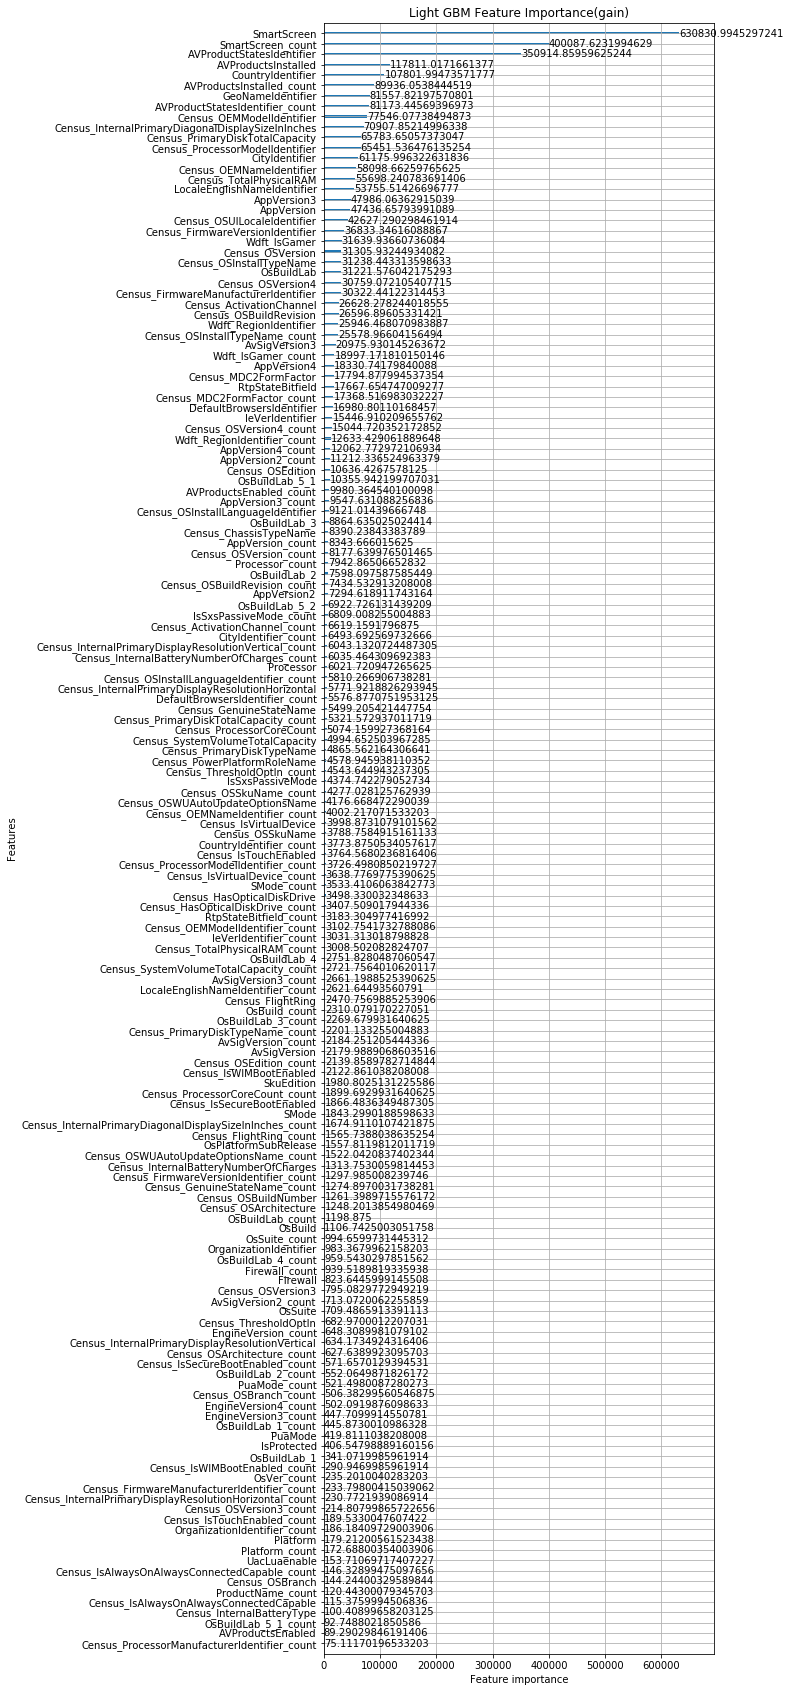

In [112]:
# feature importance
f, ax = plt.subplots(figsize=[7, 30])
lgb.plot_importance(clf, max_num_features=300, ax=ax, importance_type='gain')
plt.title("Light GBM Feature Importance(gain)")

めちゃさがった
todo  
1. kernel count追加  
For example, the count feature of CountryIdentifier, WdftRegionIdentifier, Census_OSBranch etc, which helps my model when I do CV.  
2. smart_screen_count追加

In [116]:
cols = [x for x in X_fit.columns if x not in X_fit.columns[test.columns.str.endswith('_count')]]
cols.extend(['CountryIdentifier_count', 'Wdft_RegionIdentifier_count', 'Census_OSBranch_count'])
cols

['ProductName',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'IsBeta',
 'RtpStateBitfield',
 'IsSxsPassiveMode',
 'DefaultBrowsersIdentifier',
 'AVProductStatesIdentifier',
 'AVProductsInstalled',
 'AVProductsEnabled',
 'HasTpm',
 'CountryIdentifier',
 'CityIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'LocaleEnglishNameIdentifier',
 'Platform',
 'Processor',
 'OsVer',
 'OsBuild',
 'OsSuite',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'IsProtected',
 'AutoSampleOptIn',
 'PuaMode',
 'SMode',
 'IeVerIdentifier',
 'SmartScreen',
 'Firewall',
 'UacLuaenable',
 'Census_MDC2FormFactor',
 'Census_DeviceFamily',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_ProcessorClass',
 'Census_PrimaryDiskTotalCapacity',
 'Census_PrimaryDiskTypeName',
 'Census_SystemVolumeTotalCapacity',
 'Census_HasOpticalDiskDrive',
 'Census_TotalPhysicalR

In [117]:
# eiminate os build features
param = {
    'max_depth': -1,
#     'n_estimatodrs': 30000,
    'learning_rate': 0.1,
    'colsample_bytree': 0.2,
    'objective': 'binary',
    'n_jobs': -1,
    'importance_type': 'gain',
#     "metric": 'auc'
    'metric': 'None'
}
trn_data = lgb.Dataset(X_fit[cols],
                       label=y_fit,
#                        categorical_feature = categorical_columns
                      )
val_data = lgb.Dataset(X_val[cols],
                       label=y_val,
#                        categorical_feature = categorical_columns
                      )

num_round = 10000
clf = lgb.train(param,
                trn_data,
                num_round,
                valid_sets = [val_data],
                verbose_eval = 20,
                early_stopping_rounds = 100,
                feval=eval_auc)

Training until validation scores don't improve for 100 rounds.
[20]	valid_0's auc: 0.690887
[40]	valid_0's auc: 0.698072
[60]	valid_0's auc: 0.702896
[80]	valid_0's auc: 0.70494
[100]	valid_0's auc: 0.707524
[120]	valid_0's auc: 0.708757
[140]	valid_0's auc: 0.709446
[160]	valid_0's auc: 0.710105
[180]	valid_0's auc: 0.710346
[200]	valid_0's auc: 0.710867
[220]	valid_0's auc: 0.711046
[240]	valid_0's auc: 0.711194
[260]	valid_0's auc: 0.711542
[280]	valid_0's auc: 0.71185
[300]	valid_0's auc: 0.711946
[320]	valid_0's auc: 0.712221
[340]	valid_0's auc: 0.712255
[360]	valid_0's auc: 0.712361
[380]	valid_0's auc: 0.712666
[400]	valid_0's auc: 0.712728
[420]	valid_0's auc: 0.712834
[440]	valid_0's auc: 0.712925
[460]	valid_0's auc: 0.713086
[480]	valid_0's auc: 0.713107
[500]	valid_0's auc: 0.713193
[520]	valid_0's auc: 0.713287
[540]	valid_0's auc: 0.713347
[560]	valid_0's auc: 0.713411
[580]	valid_0's auc: 0.713506
[600]	valid_0's auc: 0.71356
[620]	valid_0's auc: 0.713541
[640]	valid_0'

Text(0.5, 1.0, 'Light GBM Feature Importance(gain)')

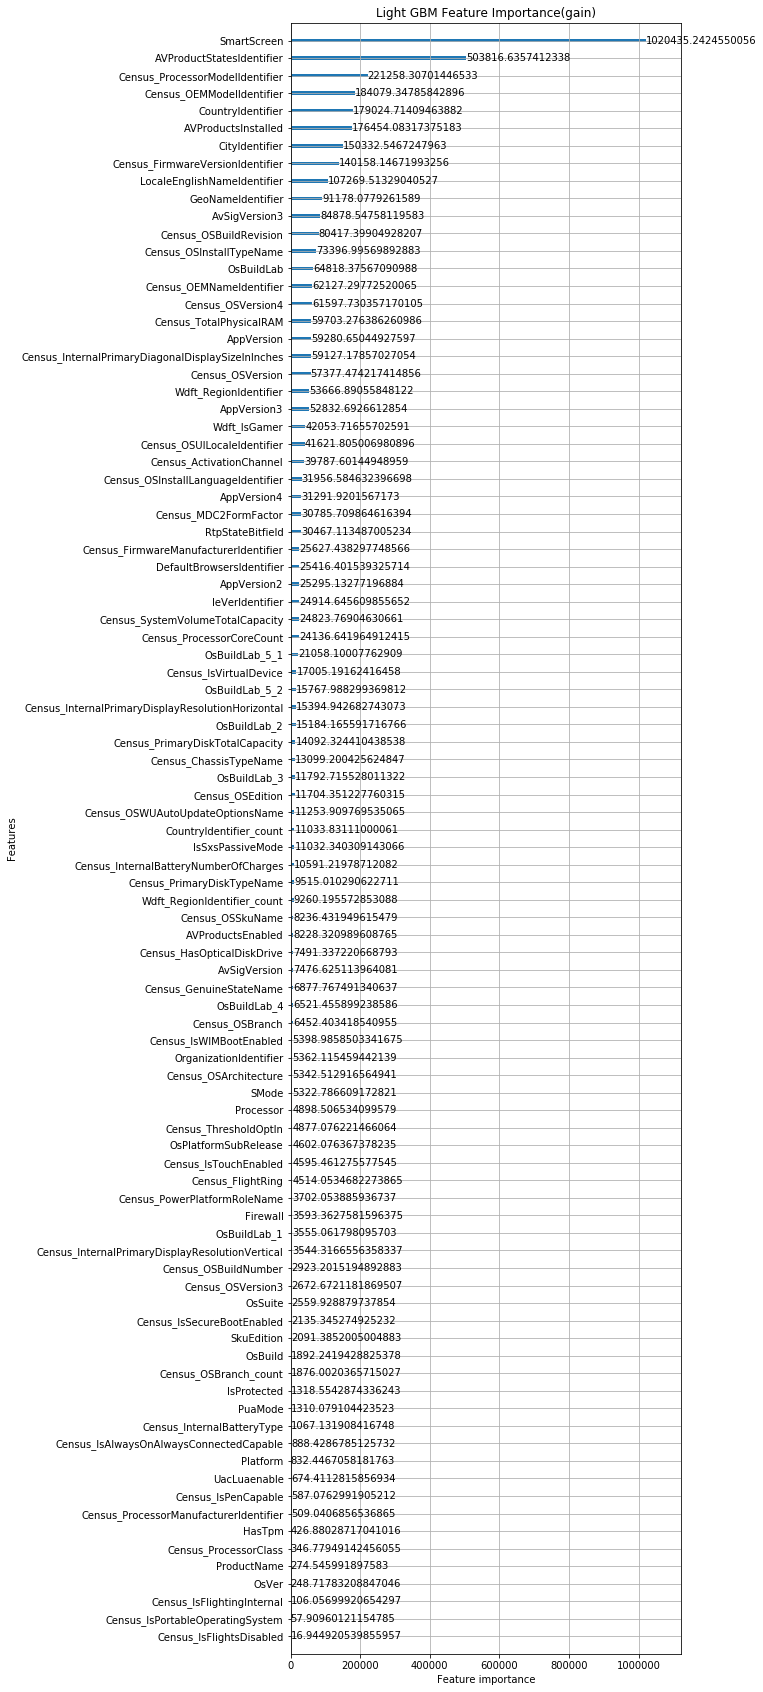

In [118]:
# feature importance
f, ax = plt.subplots(figsize=[7, 30])
lgb.plot_importance(clf, max_num_features=300, ax=ax, importance_type='gain')
plt.title("Light GBM Feature Importance(gain)")

In [119]:
plt.savefig('feature_importance_add_kernel_count.png')

<Figure size 432x288 with 0 Axes>

In [131]:
test_result = clf.predict(test_basic, num_iteration=clf.best_iteration)

array([0.47466602, 0.58969662, 0.4784748 , ..., 0.31699004, 0.52098582,
       0.27821909])

In [129]:
# make submit file
to_submit = pd.read_csv('/home/um003580/input/sample_submission.csv')
to_submit['HasDetections'] = test_result
to_submit.to_csv('submission.csv', index=False)

In [49]:
true_numerical_columns = [
    'Census_ProcessorCoreCount',
    'Census_PrimaryDiskTotalCapacity',
    'Census_SystemVolumeTotalCapacity',
    'Census_TotalPhysicalRAM',
    'Census_InternalPrimaryDiagonalDisplaySizeInInches',
    'Census_InternalPrimaryDisplayResolutionHorizontal',
    'Census_InternalPrimaryDisplayResolutionVertical',
    'Census_InternalBatteryNumberOfCharges'
]

categorical_feature = [x for x in train.columns if x not in train.columns[train.columns.str.endswith('_count')]]
categorical_feature = [x for x in categorical_feature if x not in true_numerical_columns]
categorical_feature = [x for x in categorical_feature if x not in ['HasDetections', 'MachineIdentifier']]

# cols.extend(['CountryIdentifier_count', 'Wdft_RegionIdentifier_count', 'Census_OSBranch_count'])
train[categorical_feature].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8921483 entries, 0 to 8921482
Data columns (total 90 columns):
ProductName                                category
EngineVersion                              category
AppVersion                                 category
AvSigVersion                               category
IsBeta                                     category
RtpStateBitfield                           category
IsSxsPassiveMode                           category
DefaultBrowsersIdentifier                  category
AVProductStatesIdentifier                  category
AVProductsInstalled                        category
AVProductsEnabled                          category
HasTpm                                     category
CountryIdentifier                          category
CityIdentifier                             category
OrganizationIdentifier                     category
GeoNameIdentifier                          category
LocaleEnglishNameIdentifier                category
Pla

In [53]:
cols = [x for x in X_fit.columns if x not in X_fit.columns[test.columns.str.endswith('_count')]]
cols.extend(['CountryIdentifier_count', 'Wdft_RegionIdentifier_count', 'Census_OSBranch_count'])
cols

['ProductName',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'IsBeta',
 'RtpStateBitfield',
 'IsSxsPassiveMode',
 'DefaultBrowsersIdentifier',
 'AVProductStatesIdentifier',
 'AVProductsInstalled',
 'AVProductsEnabled',
 'HasTpm',
 'CountryIdentifier',
 'CityIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'LocaleEnglishNameIdentifier',
 'Platform',
 'Processor',
 'OsVer',
 'OsBuild',
 'OsSuite',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'IsProtected',
 'AutoSampleOptIn',
 'PuaMode',
 'SMode',
 'IeVerIdentifier',
 'SmartScreen',
 'Firewall',
 'UacLuaenable',
 'Census_MDC2FormFactor',
 'Census_DeviceFamily',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_ProcessorClass',
 'Census_PrimaryDiskTotalCapacity',
 'Census_PrimaryDiskTypeName',
 'Census_SystemVolumeTotalCapacity',
 'Census_HasOpticalDiskDrive',
 'Census_TotalPhysicalR

In [54]:
# eiminate os build features
param = {
    'max_depth': -1,
#     'n_estimatodrs': 30000,
    'learning_rate': 0.1,
    'colsample_bytree': 0.2,
    'objective': 'binary',
    'n_jobs': -1,
    'importance_type': 'gain',
#     "metric": 'auc'
    'metric': 'None'
}
trn_data = lgb.Dataset(X_fit[cols],
                       label=y_fit,
                       categorical_feature = categorical_feature
                      )
val_data = lgb.Dataset(X_val[cols],
                       label=y_val,
                       categorical_feature = categorical_feature
                      )

num_round = 10000
clf = lgb.train(param,
                trn_data,
                num_round,
                valid_sets = [val_data],
                verbose_eval = 20,
                early_stopping_rounds = 100,
                feval=eval_auc)

/home/um003580/anaconda3/lib/python3.7/site-packages/lightgbm/basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/home/um003580/anaconda3/lib/python3.7/site-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[20]	valid_0's auc: 0.690887
[40]	valid_0's auc: 0.698072
[60]	valid_0's auc: 0.702896
[80]	valid_0's auc: 0.70494
[100]	valid_0's auc: 0.707524
[120]	valid_0's auc: 0.708757
[140]	valid_0's auc: 0.709446
[160]	valid_0's auc: 0.710105
[180]	valid_0's auc: 0.710346


KeyboardInterrupt: 

結論
categorical feature指定しても変わらない
todo
numeric featureつくる

In [55]:
for df in [train, test]:
    df['primary_drive_c_ratio'] = df['Census_SystemVolumeTotalCapacity']/ df['Census_PrimaryDiskTotalCapacity']
    df['non_primary_drive_MB'] = df['Census_PrimaryDiskTotalCapacity'] - df['Census_SystemVolumeTotalCapacity']

In [56]:
train.head()

ProductName EngineVersion AppVersion AvSigVersion IsBeta RtpStateBitfield  \
0           5             0          0            0      1                7   
1           5            57         30         6465      1                7   
2           5             0          0            0      1                7   
3           5             0          0            0      1                7   
4           5             0          0            0      1                7   

  IsSxsPassiveMode DefaultBrowsersIdentifier AVProductStatesIdentifier  \
0                1                      2610                     26978   
1                1                      2610                     26978   
2                1                      2610                     26978   
3                1                      2610                     26978   
4                1                      2610                     26978   

  AVProductsInstalled         ...          Census_OSVersion3_count  \
0                   2         ...                          7987759   
1                   2         ...                          7987759   
2                   2         ...                          7987759   
3                   2         ...                          7987759   
4                   2         ...                          7987759   

  Census_OSVersion4_count OsBuildLab_1_count OsBuildLab_2_count  \
0                  959932            7808674            8099217   
1                  285590            7808674            8099217   
2                  959932            7808674            8099217   
3                 1565473            7808674            8099217   
4                  252155            7808674            8099217   

  OsBuildLab_3_count OsBuildLab_4_count OsBuildLab_5_1_count  \
0           15278759            7808682              7819574   
1           15278759            7808682              7819574   
2           15278759            7808682              7819574   
3           15278759            7808682              7819574   
4           15278759            7808682              7819574   

  OsBuildLab_5_2_count primary_drive_c_ratio non_primary_drive_MB  
0              7814547              0.627859             177489.0  
1              7814547              0.214671             374555.0  
2              7814547              0.995056                566.0  
3              7814547              0.952368              11359.0  
4              7814547              0.213654             375040.0  

[5 rows x 200 columns]

In [57]:
test.head()

ProductName EngineVersion AppVersion AvSigVersion IsBeta RtpStateBitfield  \
0           5             0          0            0      1                7   
1           5             0          0            0      1                7   
2           5             0          0            0      1                7   
3           5             0          0            0      1                7   
4           5             0          0            0      1                7   

  IsSxsPassiveMode DefaultBrowsersIdentifier AVProductStatesIdentifier  \
0                1                      2610                     26978   
1                1                      2610                     26978   
2                1                      2610                     24385   
3                1                      2610                     19504   
4                1                      2610                     26978   

  AVProductsInstalled         ...          Census_OSVersion3_count  \
0                   2         ...                          1423733   
1                   2         ...                          4071183   
2                   3         ...                          1389321   
3                   3         ...                          4071183   
4                   2         ...                          4071183   

  Census_OSVersion4_count OsBuildLab_1_count OsBuildLab_2_count  \
0                  113180            1396358            1590960   
1                  304273            4194257            1775360   
2                  415164            1306389             427526   
3                  521060            4194257            2058494   
4                  521060            4194257            2058494   

  OsBuildLab_3_count OsBuildLab_4_count OsBuildLab_5_1_count  \
0           15278759            1396357              1396355   
1           15278759            1775362              1775360   
2           15278759             958094               427526   
3           15278759            2058530              2058494   
4           15278759            2058530              2058494   

  OsBuildLab_5_2_count primary_drive_c_ratio non_primary_drive_MB  
0              1419333              0.252216             365207.0  
1              1789052              0.986698              25377.0  
2               427526              0.961704               1142.0  
3              2058587              0.921175              37595.0  
4              2058587              0.967640              15434.0  

[5 rows x 199 columns]

In [58]:
X_val = train.loc[train_index]
y_val = X_val['HasDetections']
del X_val['HasDetections']
X_fit = train.loc[valid_index]
y_fit = X_fit['HasDetections']
del X_fit['HasDetections']

In [60]:
cols.extend(['primary_drive_c_ratio', 'non_primary_drive_MB'])

In [61]:
cols

['ProductName',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'IsBeta',
 'RtpStateBitfield',
 'IsSxsPassiveMode',
 'DefaultBrowsersIdentifier',
 'AVProductStatesIdentifier',
 'AVProductsInstalled',
 'AVProductsEnabled',
 'HasTpm',
 'CountryIdentifier',
 'CityIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'LocaleEnglishNameIdentifier',
 'Platform',
 'Processor',
 'OsVer',
 'OsBuild',
 'OsSuite',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'IsProtected',
 'AutoSampleOptIn',
 'PuaMode',
 'SMode',
 'IeVerIdentifier',
 'SmartScreen',
 'Firewall',
 'UacLuaenable',
 'Census_MDC2FormFactor',
 'Census_DeviceFamily',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_ProcessorClass',
 'Census_PrimaryDiskTotalCapacity',
 'Census_PrimaryDiskTypeName',
 'Census_SystemVolumeTotalCapacity',
 'Census_HasOpticalDiskDrive',
 'Census_TotalPhysicalR

In [62]:
# eiminate os build features
param = {
    'max_depth': -1,
#     'n_estimatodrs': 30000,
    'learning_rate': 0.1,
    'colsample_bytree': 0.2,
    'objective': 'binary',
    'n_jobs': -1,
    'importance_type': 'gain',
#     "metric": 'auc'
    'metric': 'None'
}
trn_data = lgb.Dataset(X_fit[cols],
                       label=y_fit,
#                        categorical_feature = categorical_feature
                      )
val_data = lgb.Dataset(X_val[cols],
                       label=y_val,
#                        categorical_feature = categorical_feature
                      )

num_round = 10000
clf = lgb.train(param,
                trn_data,
                num_round,
                valid_sets = [val_data],
                verbose_eval = 20,
                early_stopping_rounds = 100,
                feval=eval_auc)

/home/um003580/anaconda3/lib/python3.7/site-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[20]	valid_0's auc: 0.693986
[40]	valid_0's auc: 0.699211
[60]	valid_0's auc: 0.70406
[80]	valid_0's auc: 0.705394
[100]	valid_0's auc: 0.706922
[120]	valid_0's auc: 0.707879
[140]	valid_0's auc: 0.708703
[160]	valid_0's auc: 0.709466
[180]	valid_0's auc: 0.71017
[200]	valid_0's auc: 0.710477
[220]	valid_0's auc: 0.710736
[240]	valid_0's auc: 0.711128
[260]	valid_0's auc: 0.711328
[280]	valid_0's auc: 0.711503
[300]	valid_0's auc: 0.711631
[320]	valid_0's auc: 0.711933
[340]	valid_0's auc: 0.712205
[360]	valid_0's auc: 0.712347
[380]	valid_0's auc: 0.712435
[400]	valid_0's auc: 0.712724
[420]	valid_0's auc: 0.712762
[440]	valid_0's auc: 0.7129
[460]	valid_0's auc: 0.712952
[480]	valid_0's auc: 0.713115
[500]	valid_0's auc: 0.713167
[520]	valid_0's auc: 0.713204
[540]	valid_0's auc: 0.713233
[560]	valid_0's auc: 0.713387
[580]	valid_0's auc: 0.713448
[600]	valid_0's auc: 0.713512
[620]	valid_0's auc: 0.713556
[640]	valid_0's

上がったけど誤差だなぁ

Text(0.5, 1.0, 'Light GBM Feature Importance(gain)')

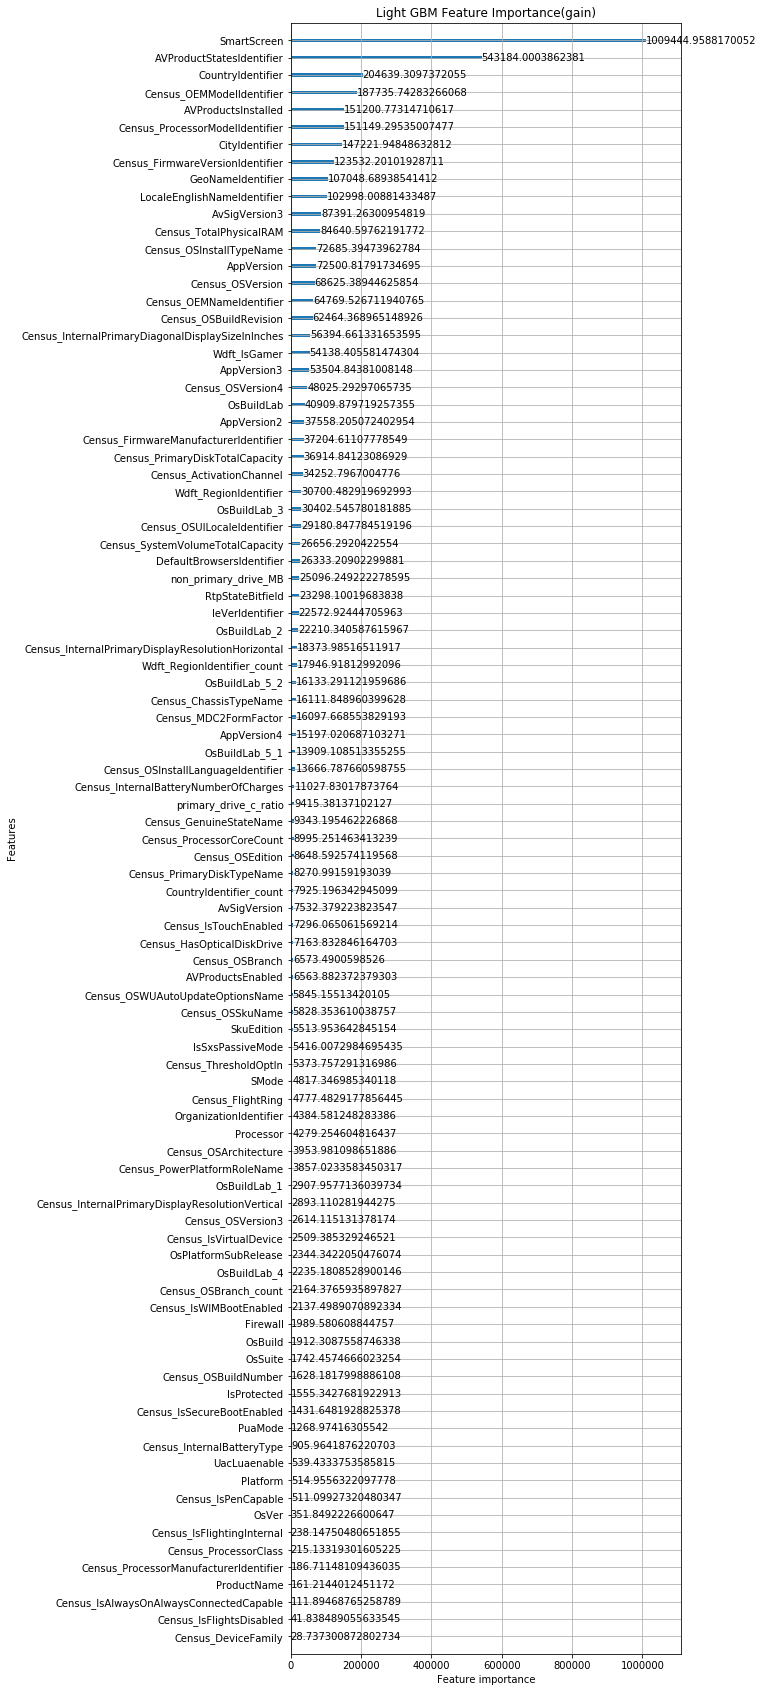

In [63]:
# feature importance
f, ax = plt.subplots(figsize=[7, 30])
lgb.plot_importance(clf, max_num_features=300, ax=ax, importance_type='gain')
plt.title("Light GBM Feature Importance(gain)")

In [69]:
# AVProductStatesIdentifier_count追加
cols.append('AVProductStatesIdentifier_count')
cols

['ProductName',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'IsBeta',
 'RtpStateBitfield',
 'IsSxsPassiveMode',
 'DefaultBrowsersIdentifier',
 'AVProductsInstalled',
 'AVProductsEnabled',
 'HasTpm',
 'CountryIdentifier',
 'CityIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'LocaleEnglishNameIdentifier',
 'Platform',
 'Processor',
 'OsVer',
 'OsBuild',
 'OsSuite',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'IsProtected',
 'AutoSampleOptIn',
 'PuaMode',
 'SMode',
 'IeVerIdentifier',
 'SmartScreen',
 'Firewall',
 'UacLuaenable',
 'Census_MDC2FormFactor',
 'Census_DeviceFamily',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_ProcessorClass',
 'Census_PrimaryDiskTotalCapacity',
 'Census_PrimaryDiskTypeName',
 'Census_SystemVolumeTotalCapacity',
 'Census_HasOpticalDiskDrive',
 'Census_TotalPhysicalRAM',
 'Census_ChassisTypeName'

In [70]:
# eiminate os build features
param = {
    'max_depth': -1,
#     'n_estimatodrs': 30000,
    'learning_rate': 0.1,
    'colsample_bytree': 0.2,
    'objective': 'binary',
    'n_jobs': -1,
    'importance_type': 'gain',
#     "metric": 'auc'
    'metric': 'None'
}
trn_data = lgb.Dataset(X_fit[cols],
                       label=y_fit,
#                        categorical_feature = categorical_feature
                      )
val_data = lgb.Dataset(X_val[cols],
                       label=y_val,
#                        categorical_feature = categorical_feature
                      )

num_round = 10000
clf = lgb.train(param,
                trn_data,
                num_round,
                valid_sets = [val_data],
                verbose_eval = 20,
                early_stopping_rounds = 100,
                feval=eval_auc)

Training until validation scores don't improve for 100 rounds.
[20]	valid_0's auc: 0.688459
[40]	valid_0's auc: 0.699769
[60]	valid_0's auc: 0.704489
[80]	valid_0's auc: 0.705451
[100]	valid_0's auc: 0.707248
[120]	valid_0's auc: 0.708419
[140]	valid_0's auc: 0.70949
[160]	valid_0's auc: 0.710061
[180]	valid_0's auc: 0.710635
[200]	valid_0's auc: 0.711021
[220]	valid_0's auc: 0.711415
[240]	valid_0's auc: 0.711381
[260]	valid_0's auc: 0.711493
[280]	valid_0's auc: 0.711952
[300]	valid_0's auc: 0.71206
[320]	valid_0's auc: 0.712358
[340]	valid_0's auc: 0.712361
[360]	valid_0's auc: 0.712306
[380]	valid_0's auc: 0.7124
[400]	valid_0's auc: 0.712619
[420]	valid_0's auc: 0.712741
[440]	valid_0's auc: 0.712774
[460]	valid_0's auc: 0.713018
[480]	valid_0's auc: 0.713149
[500]	valid_0's auc: 0.71312
[520]	valid_0's auc: 0.713144
[540]	valid_0's auc: 0.71314
[560]	valid_0's auc: 0.713288
[580]	valid_0's auc: 0.71339
[600]	valid_0's auc: 0.713432
[620]	valid_0's auc: 0.713274
[640]	valid_0's au

Text(0.5, 1.0, 'Light GBM Feature Importance(gain)')

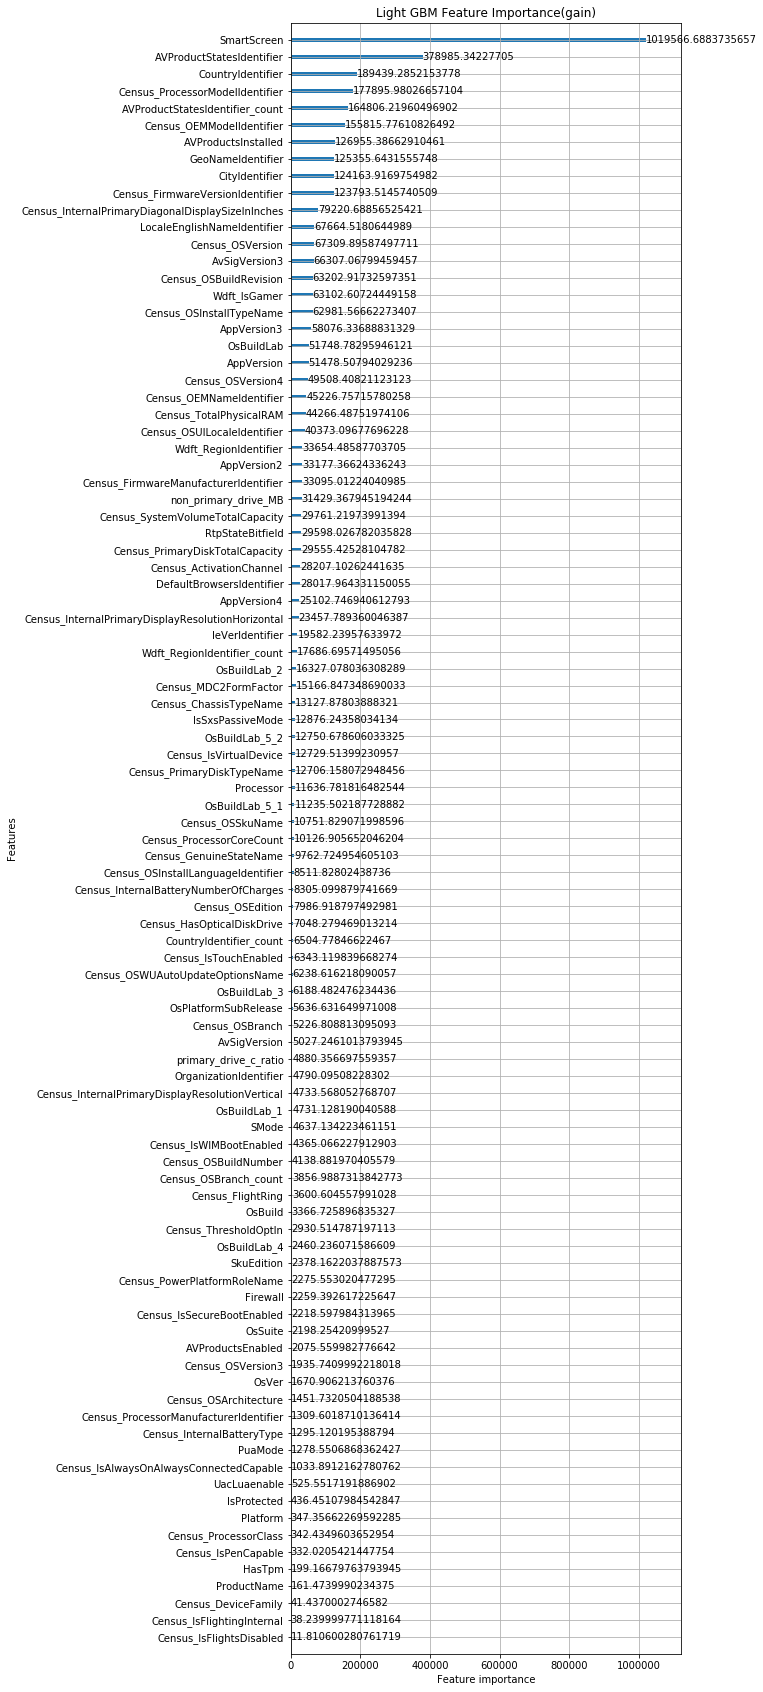

In [71]:
# feature importance
f, ax = plt.subplots(figsize=[7, 30])
lgb.plot_importance(clf, max_num_features=300, ax=ax, importance_type='gain')
plt.title("Light GBM Feature Importance(gain)")

In [74]:
# Census_OEMModelIdentifier_count, Census_ProcessorModelIdentifier_count追加
# cols.remove('AVProductStatesIdentifier_count')
cols.extend(['Census_OEMModelIdentifier_count', 'Census_ProcessorModelIdentifier_count'])

In [75]:
# eiminate os build features
param = {
    'max_depth': -1,
#     'n_estimatodrs': 30000,
    'learning_rate': 0.1,
    'colsample_bytree': 0.2,
    'objective': 'binary',
    'n_jobs': -1,
    'importance_type': 'gain',
#     "metric": 'auc'
    'metric': 'None'
}
trn_data = lgb.Dataset(X_fit[cols],
                       label=y_fit,
#                        categorical_feature = categorical_feature
                      )
val_data = lgb.Dataset(X_val[cols],
                       label=y_val,
#                        categorical_feature = categorical_feature
                      )

num_round = 10000
clf = lgb.train(param,
                trn_data,
                num_round,
                valid_sets = [val_data],
                verbose_eval = 20,
                early_stopping_rounds = 100,
                feval=eval_auc)

Training until validation scores don't improve for 100 rounds.
[20]	valid_0's auc: 0.682329
[40]	valid_0's auc: 0.69636
[60]	valid_0's auc: 0.701986
[80]	valid_0's auc: 0.707076
[100]	valid_0's auc: 0.708499
[120]	valid_0's auc: 0.709549
[140]	valid_0's auc: 0.709993
[160]	valid_0's auc: 0.709985
[180]	valid_0's auc: 0.710126
[200]	valid_0's auc: 0.710421
[220]	valid_0's auc: 0.710466
[240]	valid_0's auc: 0.710797
[260]	valid_0's auc: 0.71108
[280]	valid_0's auc: 0.711416
[300]	valid_0's auc: 0.711734
[320]	valid_0's auc: 0.711709
[340]	valid_0's auc: 0.711916
[360]	valid_0's auc: 0.712035
[380]	valid_0's auc: 0.71221
[400]	valid_0's auc: 0.712347
[420]	valid_0's auc: 0.712392
[440]	valid_0's auc: 0.712481
[460]	valid_0's auc: 0.712457
[480]	valid_0's auc: 0.712437
[500]	valid_0's auc: 0.712506
[520]	valid_0's auc: 0.712578
[540]	valid_0's auc: 0.712652
[560]	valid_0's auc: 0.7127
[580]	valid_0's auc: 0.712919
[600]	valid_0's auc: 0.7129
[620]	valid_0's auc: 0.712991
[640]	valid_0's au

Text(0.5, 1.0, 'Light GBM Feature Importance(gain)')

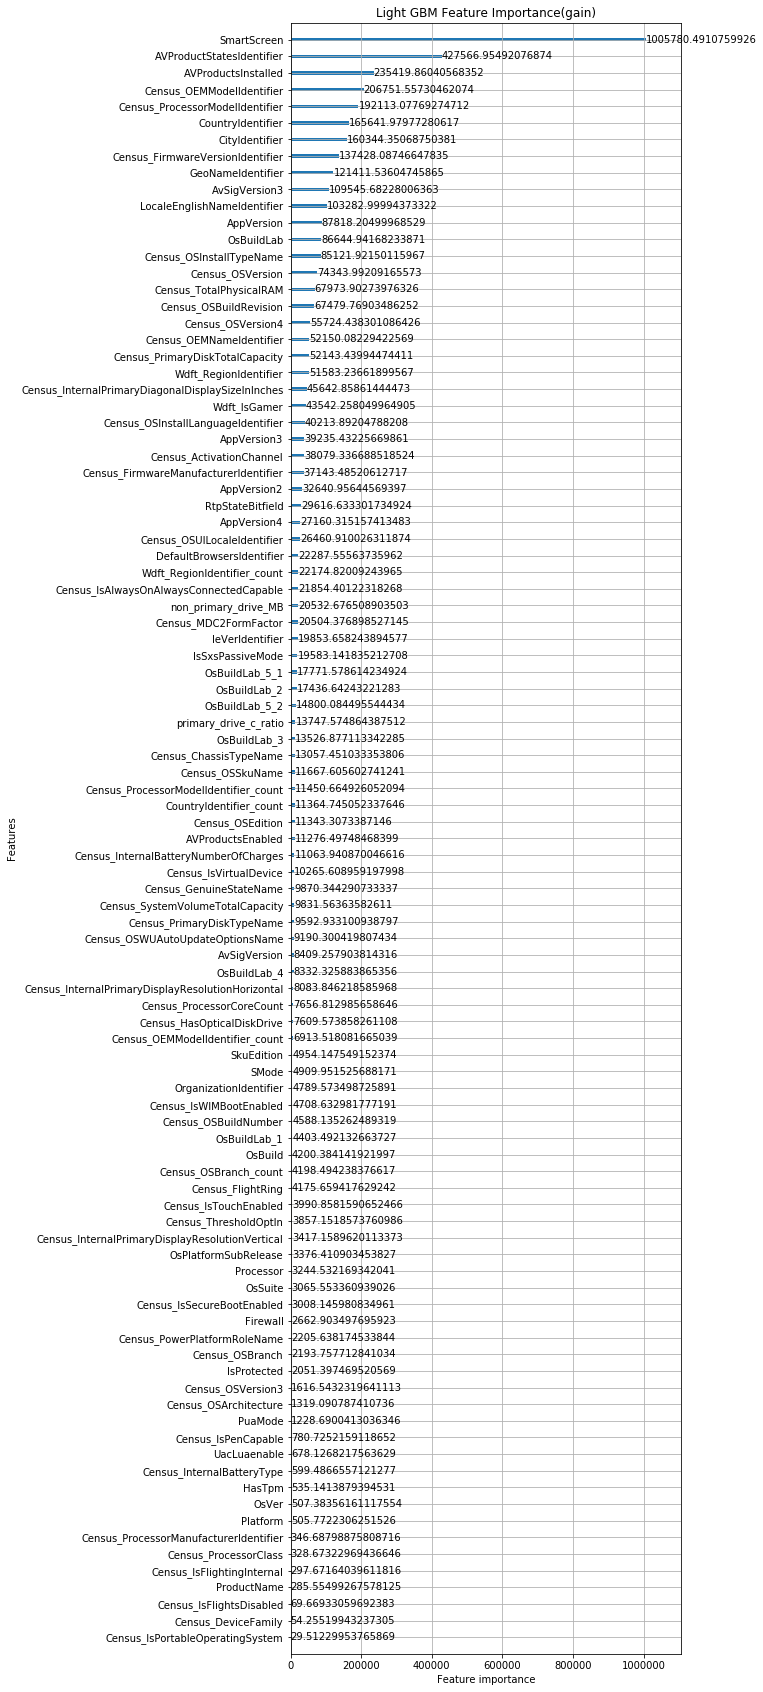

In [80]:
# feature importance
f, ax = plt.subplots(figsize=[7, 30])
lgb.plot_importance(clf, max_num_features=300, ax=ax, importance_type='gain')
plt.title("Light GBM Feature Importance(gain)")

In [78]:
# ['GeoNameIdentifier','CityIdentifier']追加
cols.remove('Census_ProcessorModelIdentifier_count')
cols.remove('Census_OEMModelIdentifier_count')
cols.extend(['GeoNameIdentifier_count','CityIdentifier_count'])

In [81]:
# eiminate os build features
param = {
    'max_depth': -1,
#     'n_estimatodrs': 30000,
    'learning_rate': 0.1,
    'colsample_bytree': 0.2,
    'objective': 'binary',
    'n_jobs': -1,
    'importance_type': 'gain',
#     "metric": 'auc'
    'metric': 'None'
}
trn_data = lgb.Dataset(X_fit[cols],
                       label=y_fit,
#                        categorical_feature = categorical_feature
                      )
val_data = lgb.Dataset(X_val[cols],
                       label=y_val,
#                        categorical_feature = categorical_feature
                      )

num_round = 10000
clf = lgb.train(param,
                trn_data,
                num_round,
                valid_sets = [val_data],
                verbose_eval = 20,
                early_stopping_rounds = 100,
                feval=eval_auc)

Training until validation scores don't improve for 100 rounds.
[20]	valid_0's auc: 0.682758
[40]	valid_0's auc: 0.696332
[60]	valid_0's auc: 0.70194
[80]	valid_0's auc: 0.707122
[100]	valid_0's auc: 0.708621
[120]	valid_0's auc: 0.709504
[140]	valid_0's auc: 0.709864
[160]	valid_0's auc: 0.709606
[180]	valid_0's auc: 0.709908
[200]	valid_0's auc: 0.710529
[220]	valid_0's auc: 0.710614
[240]	valid_0's auc: 0.711106
[260]	valid_0's auc: 0.711447
[280]	valid_0's auc: 0.711874
[300]	valid_0's auc: 0.712099
[320]	valid_0's auc: 0.711954
[340]	valid_0's auc: 0.71216
[360]	valid_0's auc: 0.712295
[380]	valid_0's auc: 0.712333
[400]	valid_0's auc: 0.712419
[420]	valid_0's auc: 0.712526
[440]	valid_0's auc: 0.712653
[460]	valid_0's auc: 0.712735
[480]	valid_0's auc: 0.712753
[500]	valid_0's auc: 0.712811
[520]	valid_0's auc: 0.712907
[540]	valid_0's auc: 0.712988
[560]	valid_0's auc: 0.713038
[580]	valid_0's auc: 0.713175
[600]	valid_0's auc: 0.713286
[620]	valid_0's auc: 0.713337
[640]	valid_0

Text(0.5, 1.0, 'Light GBM Feature Importance(gain)')

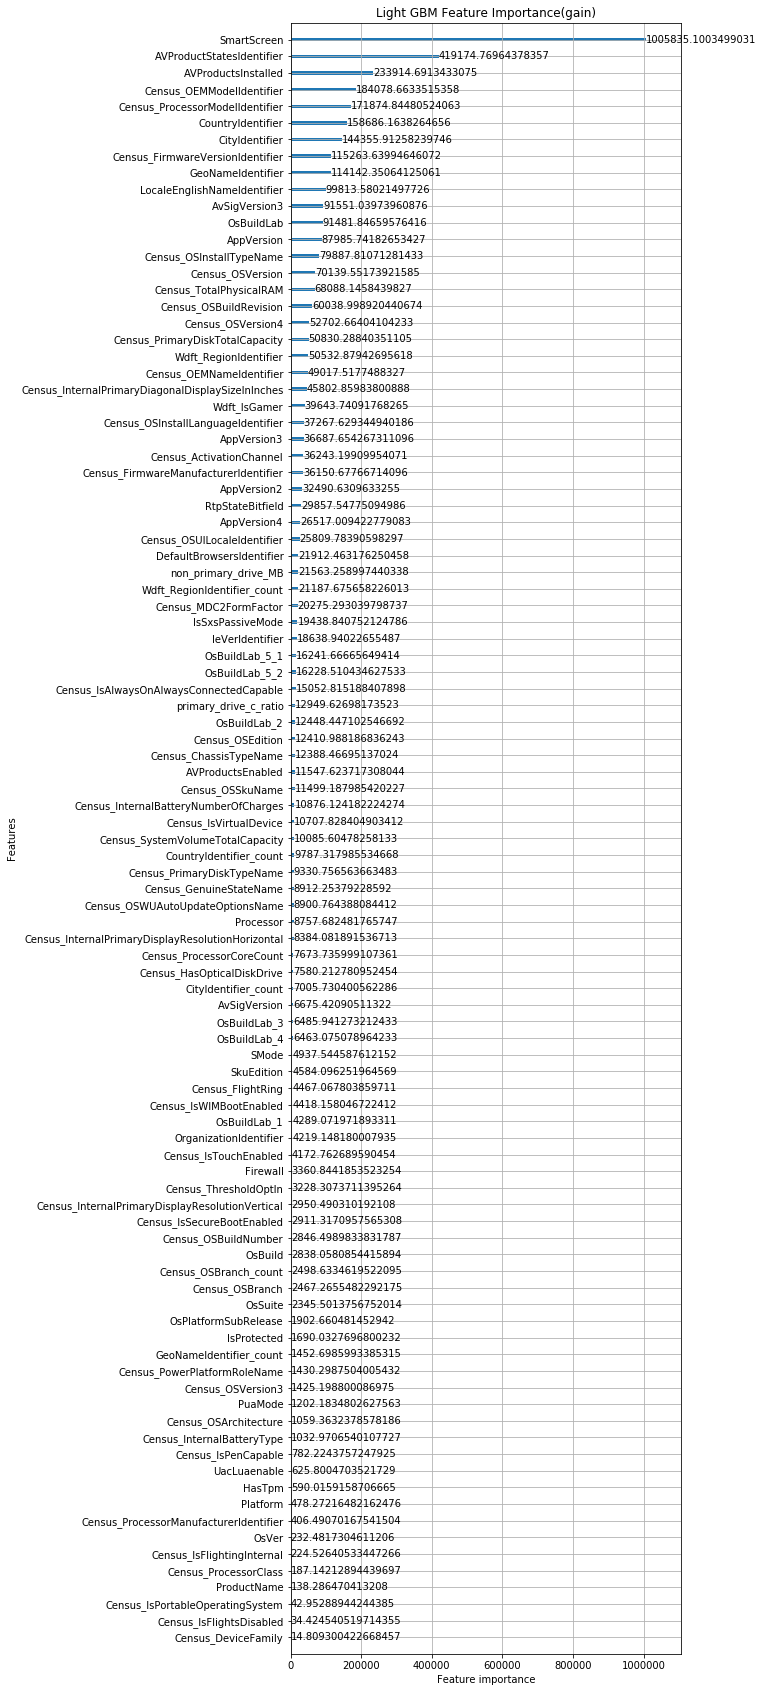

In [82]:
# feature importance
f, ax = plt.subplots(figsize=[7, 30])
lgb.plot_importance(clf, max_num_features=300, ax=ax, importance_type='gain')
plt.title("Light GBM Feature Importance(gain)")

In [86]:
# ['LocaleEnglishNameIdentifier','Census_FirmwareVersionIdentifier']追加
cols.remove('LocaleEnglishNameIdentifier')
cols.remove('Census_FirmwareVersionIdentifier')
cols.extend(['LocaleEnglishNameIdentifier_count','Census_FirmwareVersionIdentifier_count'])

In [87]:
cols

['ProductName',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'IsBeta',
 'RtpStateBitfield',
 'IsSxsPassiveMode',
 'DefaultBrowsersIdentifier',
 'AVProductsInstalled',
 'AVProductsEnabled',
 'HasTpm',
 'CountryIdentifier',
 'CityIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'Platform',
 'Processor',
 'OsVer',
 'OsBuild',
 'OsSuite',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'IsProtected',
 'AutoSampleOptIn',
 'PuaMode',
 'SMode',
 'IeVerIdentifier',
 'SmartScreen',
 'Firewall',
 'UacLuaenable',
 'Census_MDC2FormFactor',
 'Census_DeviceFamily',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_ProcessorClass',
 'Census_PrimaryDiskTotalCapacity',
 'Census_PrimaryDiskTypeName',
 'Census_SystemVolumeTotalCapacity',
 'Census_HasOpticalDiskDrive',
 'Census_TotalPhysicalRAM',
 'Census_ChassisTypeName',
 'Census_InternalPrimaryDiagon

In [88]:
# eiminate os build features
param = {
    'max_depth': -1,
#     'n_estimatodrs': 30000,
    'learning_rate': 0.1,
    'colsample_bytree': 0.2,
    'objective': 'binary',
    'n_jobs': -1,
    'importance_type': 'gain',
#     "metric": 'auc'
    'metric': 'None'
}
trn_data = lgb.Dataset(X_fit[cols],
                       label=y_fit,
#                        categorical_feature = categorical_feature
                      )
val_data = lgb.Dataset(X_val[cols],
                       label=y_val,
#                        categorical_feature = categorical_feature
                      )

num_round = 10000
clf = lgb.train(param,
                trn_data,
                num_round,
                valid_sets = [val_data],
                verbose_eval = 20,
                early_stopping_rounds = 100,
                feval=eval_auc)

Training until validation scores don't improve for 100 rounds.
[20]	valid_0's auc: 0.692709
[40]	valid_0's auc: 0.700692
[60]	valid_0's auc: 0.704549
[80]	valid_0's auc: 0.705826
[100]	valid_0's auc: 0.707457
[120]	valid_0's auc: 0.707967
[140]	valid_0's auc: 0.708345
[160]	valid_0's auc: 0.708883
[180]	valid_0's auc: 0.709731
[200]	valid_0's auc: 0.710404
[220]	valid_0's auc: 0.710602
[240]	valid_0's auc: 0.710785
[260]	valid_0's auc: 0.711317
[280]	valid_0's auc: 0.711456
[300]	valid_0's auc: 0.711642
[320]	valid_0's auc: 0.711788
[340]	valid_0's auc: 0.71215
[360]	valid_0's auc: 0.712332
[380]	valid_0's auc: 0.712448
[400]	valid_0's auc: 0.712545
[420]	valid_0's auc: 0.712548
[440]	valid_0's auc: 0.712676
[460]	valid_0's auc: 0.712869
[480]	valid_0's auc: 0.713065
[500]	valid_0's auc: 0.71327
[520]	valid_0's auc: 0.713288
[540]	valid_0's auc: 0.713136
[560]	valid_0's auc: 0.713168
[580]	valid_0's auc: 0.71322
[600]	valid_0's auc: 0.713318
[620]	valid_0's auc: 0.713334
[640]	valid_0'

In [89]:
cols.remove('LocaleEnglishNameIdentifier_count')
cols.remove('Census_FirmwareVersionIdentifier_count')
cols.extend(['ProductName_count','OsPlatformSubRelease_count'])

In [90]:
# eiminate os build features
param = {
    'max_depth': -1,
#     'n_estimatodrs': 30000,
    'learning_rate': 0.1,
    'colsample_bytree': 0.2,
    'objective': 'binary',
    'n_jobs': -1,
    'importance_type': 'gain',
#     "metric": 'auc'
    'metric': 'None'
}
trn_data = lgb.Dataset(X_fit[cols],
                       label=y_fit,
#                        categorical_feature = categorical_feature
                      )
val_data = lgb.Dataset(X_val[cols],
                       label=y_val,
#                        categorical_feature = categorical_feature
                      )

num_round = 10000
clf = lgb.train(param,
                trn_data,
                num_round,
                valid_sets = [val_data],
                verbose_eval = 20,
                early_stopping_rounds = 100,
                feval=eval_auc)

Training until validation scores don't improve for 100 rounds.
[20]	valid_0's auc: 0.693126
[40]	valid_0's auc: 0.70063
[60]	valid_0's auc: 0.704166
[80]	valid_0's auc: 0.705426
[100]	valid_0's auc: 0.707187
[120]	valid_0's auc: 0.707925
[140]	valid_0's auc: 0.708339
[160]	valid_0's auc: 0.708755
[180]	valid_0's auc: 0.709079
[200]	valid_0's auc: 0.709771
[220]	valid_0's auc: 0.709976
[240]	valid_0's auc: 0.710399
[260]	valid_0's auc: 0.710829
[280]	valid_0's auc: 0.711094
[300]	valid_0's auc: 0.711342
[320]	valid_0's auc: 0.711276
[340]	valid_0's auc: 0.711512
[360]	valid_0's auc: 0.711722
[380]	valid_0's auc: 0.711888
[400]	valid_0's auc: 0.712027
[420]	valid_0's auc: 0.712154
[440]	valid_0's auc: 0.712239
[460]	valid_0's auc: 0.712067
[480]	valid_0's auc: 0.712195
[500]	valid_0's auc: 0.712279
[520]	valid_0's auc: 0.712401
[540]	valid_0's auc: 0.712374
[560]	valid_0's auc: 0.712475
[580]	valid_0's auc: 0.71253
[600]	valid_0's auc: 0.712668
[620]	valid_0's auc: 0.712781
[640]	valid_0

In [ ]:
Training until validation scores don't improve for 100 rounds.
[20]	valid_0's auc: 0.693986
[40]	valid_0's auc: 0.699211
[60]	valid_0's auc: 0.70406
[80]	valid_0's auc: 0.705394
[100]	valid_0's auc: 0.706922
[120]	valid_0's auc: 0.707879
[140]	valid_0's auc: 0.708703
[160]	valid_0's auc: 0.709466
[180]	valid_0's auc: 0.71017
[200]	valid_0's auc: 0.710477
[220]	valid_0's auc: 0.710736
[240]	valid_0's auc: 0.711128
[260]	valid_0's auc: 0.711328
[280]	valid_0's auc: 0.711503
[300]	valid_0's auc: 0.711631
[320]	valid_0's auc: 0.711933
[340]	valid_0's auc: 0.712205
[360]	valid_0's auc: 0.712347
[380]	valid_0's auc: 0.712435
[400]	valid_0's auc: 0.712724
[420]	valid_0's auc: 0.712762
[440]	valid_0's auc: 0.7129
[460]	valid_0's auc: 0.712952
[480]	valid_0's auc: 0.713115
[500]	valid_0's auc: 0.713167
[520]	valid_0's auc: 0.713204
[540]	valid_0's auc: 0.713233
[560]	valid_0's auc: 0.713387
[580]	valid_0's auc: 0.713448
[600]	valid_0's auc: 0.713512
[620]	valid_0's auc: 0.713556
[640]	valid_0's auc: 0.713659
[660]	valid_0's auc: 0.713674
[680]	valid_0's auc: 0.713712
[700]	valid_0's auc: 0.713783
[720]	valid_0's auc: 0.713891
[740]	valid_0's auc: 0.714008
[760]	valid_0's auc: 0.713983
[780]	valid_0's auc: 0.713975
[800]	valid_0's auc: 0.713965
[820]	valid_0's auc: 0.71397
Early stopping, best iteration is:
[734]	valid_0's auc: 0.71402

In [91]:
cols.remove('ProductName_count')
cols.remove('OsPlatformSubRelease_count')
cols.extend(['Census_OSArchitecture_count'])

In [93]:
cols

['ProductName',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'IsBeta',
 'RtpStateBitfield',
 'IsSxsPassiveMode',
 'DefaultBrowsersIdentifier',
 'AVProductsInstalled',
 'AVProductsEnabled',
 'HasTpm',
 'CountryIdentifier',
 'CityIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'Platform',
 'Processor',
 'OsVer',
 'OsBuild',
 'OsSuite',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'IsProtected',
 'AutoSampleOptIn',
 'PuaMode',
 'SMode',
 'IeVerIdentifier',
 'SmartScreen',
 'Firewall',
 'UacLuaenable',
 'Census_MDC2FormFactor',
 'Census_DeviceFamily',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_ProcessorClass',
 'Census_PrimaryDiskTotalCapacity',
 'Census_PrimaryDiskTypeName',
 'Census_SystemVolumeTotalCapacity',
 'Census_HasOpticalDiskDrive',
 'Census_TotalPhysicalRAM',
 'Census_ChassisTypeName',
 'Census_InternalPrimaryDiagon

In [ ]:
# eiminate os build features
param = {
    'max_depth': -1,
#     'n_estimatodrs': 30000,
    'learning_rate': 0.1,
    'colsample_bytree': 0.2,
    'objective': 'binary',
    'n_jobs': -1,
    'importance_type': 'gain',
#     "metric": 'auc'
    'metric': 'None'
}
trn_data = lgb.Dataset(X_fit[cols],
                       label=y_fit,
#                        categorical_feature = categorical_feature
                      )
val_data = lgb.Dataset(X_val[cols],
                       label=y_val,
#                        categorical_feature = categorical_feature
                      )

num_round = 10000
clf = lgb.train(param,
                trn_data,
                num_round,
                valid_sets = [val_data],
                verbose_eval = 20,
                early_stopping_rounds = 100,
                feval=eval_auc)

Training until validation scores don't improve for 100 rounds.
[20]	valid_0's auc: 0.689106
[40]	valid_0's auc: 0.699787
[60]	valid_0's auc: 0.703993
[80]	valid_0's auc: 0.706589
[100]	valid_0's auc: 0.708826
[120]	valid_0's auc: 0.709698
[140]	valid_0's auc: 0.710149
[160]	valid_0's auc: 0.710172
[180]	valid_0's auc: 0.710483
[200]	valid_0's auc: 0.710838
[220]	valid_0's auc: 0.710438
[240]	valid_0's auc: 0.710889
[260]	valid_0's auc: 0.711115
[280]	valid_0's auc: 0.711305
[300]	valid_0's auc: 0.71169
[320]	valid_0's auc: 0.711831
[340]	valid_0's auc: 0.711726
[360]	valid_0's auc: 0.711879
[380]	valid_0's auc: 0.711981
[400]	valid_0's auc: 0.712132
[420]	valid_0's auc: 0.712181
[440]	valid_0's auc: 0.712305
[460]	valid_0's auc: 0.712399
[480]	valid_0's auc: 0.712487
[500]	valid_0's auc: 0.712547
[520]	valid_0's auc: 0.712645
[540]	valid_0's auc: 0.712516
[560]	valid_0's auc: 0.712449
[580]	valid_0's auc: 0.712581
[600]	valid_0's auc: 0.712636


todo
1. 'SmartScreen'
1. 'Census_OSArchitecture','OsPlatformSubRelease'
1. 'avsigversion2'

In [95]:
cols.remove('Census_OSArchitecture_count')

In [102]:
for df in [train,test]:
    df['resolution'] = df['Census_InternalPrimaryDisplayResolutionHorizontal']*df['Census_InternalPrimaryDisplayResolutionVertical']
    df['ram_1'] = df['Census_TotalPhysicalRAM'] / df['resolution']
    df['ram_2'] = df['Census_TotalPhysicalRAM'] / df['Census_PrimaryDiskTotalCapacity']
    df['ram_3'] = df['Census_TotalPhysicalRAM'] / df['Census_ProcessorCoreCount']
    df['ram_4'] = df['Census_TotalPhysicalRAM'] / df['Census_SystemVolumeTotalCapacity']
    df['ram_5'] = df['Census_TotalPhysicalRAM'] / df['Census_InternalPrimaryDiagonalDisplaySizeInInches']    

In [103]:
test.head()

ProductName EngineVersion AppVersion AvSigVersion IsBeta RtpStateBitfield  \
0           5             0          0            0      1                7   
1           5             0          0            0      1                7   
2           5             0          0            0      1                7   
3           5             0          0            0      1                7   
4           5             0          0            0      1                7   

  IsSxsPassiveMode DefaultBrowsersIdentifier AVProductStatesIdentifier  \
0                1                      2610                     26978   
1                1                      2610                     26978   
2                1                      2610                     24385   
3                1                      2610                     19504   
4                1                      2610                     26978   

  AVProductsInstalled     ...     OsBuildLab_5_1_count OsBuildLab_5_2_count  \
0                   2     ...                  1396355              1419333   
1                   2     ...                  1775360              1789052   
2                   3     ...                   427526               427526   
3                   3     ...                  2058494              2058587   
4                   2     ...                  2058494              2058587   

  primary_drive_c_ratio non_primary_drive_MB resolution     ram_1     ram_2  \
0              0.252216             365207.0  2073600.0  0.003951  0.016774   
1              0.986698              25377.0  1049088.0  0.007809  0.004294   
2              0.961704               1142.0   921600.0  0.004444  0.137357   
3              0.921175              37595.0  1049088.0  0.003904  0.008588   
4              0.967640              15434.0  1049088.0  0.001952  0.004294   

    ram_3     ram_4       ram_5  
0  2048.0  0.066505  528.516113  
1  2048.0  0.004352  528.516113  
2  2048.0  0.142827  294.676270  
3  2048.0  0.009323  292.571442  
4   512.0  0.004438  132.129028  

[5 rows x 205 columns]

In [96]:
cols.extend(['resolution','ram_1','ram_2','ram_3','ram_4','ram_5'])

In [97]:
cols

['ProductName',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'IsBeta',
 'RtpStateBitfield',
 'IsSxsPassiveMode',
 'DefaultBrowsersIdentifier',
 'AVProductsInstalled',
 'AVProductsEnabled',
 'HasTpm',
 'CountryIdentifier',
 'CityIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'Platform',
 'Processor',
 'OsVer',
 'OsBuild',
 'OsSuite',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'IsProtected',
 'AutoSampleOptIn',
 'PuaMode',
 'SMode',
 'IeVerIdentifier',
 'SmartScreen',
 'Firewall',
 'UacLuaenable',
 'Census_MDC2FormFactor',
 'Census_DeviceFamily',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_ProcessorClass',
 'Census_PrimaryDiskTotalCapacity',
 'Census_PrimaryDiskTypeName',
 'Census_SystemVolumeTotalCapacity',
 'Census_HasOpticalDiskDrive',
 'Census_TotalPhysicalRAM',
 'Census_ChassisTypeName',
 'Census_InternalPrimaryDiagon

In [104]:
X_val = train.loc[train_index]
y_val = X_val['HasDetections']
del X_val['HasDetections']
X_fit = train.loc[valid_index]
y_fit = X_fit['HasDetections']
del X_fit['HasDetections']

In [105]:
# eiminate os build features
param = {
    'max_depth': -1,
#     'n_estimatodrs': 30000,
    'learning_rate': 0.1,
    'colsample_bytree': 0.2,
    'objective': 'binary',
    'n_jobs': -1,
    'importance_type': 'gain',
#     "metric": 'auc'
    'metric': 'None'
}
trn_data = lgb.Dataset(X_fit[cols],
                       label=y_fit,
#                        categorical_feature = categorical_feature
                      )
val_data = lgb.Dataset(X_val[cols],
                       label=y_val,
#                        categorical_feature = categorical_feature
                      )

num_round = 10000
clf = lgb.train(param,
                trn_data,
                num_round,
                valid_sets = [val_data],
                verbose_eval = 20,
                early_stopping_rounds = 100,
                feval=eval_auc)

Training until validation scores don't improve for 100 rounds.
[20]	valid_0's auc: 0.694501
[40]	valid_0's auc: 0.697957
[60]	valid_0's auc: 0.701735
[80]	valid_0's auc: 0.704462
[100]	valid_0's auc: 0.706413
[120]	valid_0's auc: 0.707284
[140]	valid_0's auc: 0.708038
[160]	valid_0's auc: 0.708574
[180]	valid_0's auc: 0.708946
[200]	valid_0's auc: 0.70978
[220]	valid_0's auc: 0.710301
[240]	valid_0's auc: 0.710795
[260]	valid_0's auc: 0.711043
[280]	valid_0's auc: 0.711091
[300]	valid_0's auc: 0.711329
[320]	valid_0's auc: 0.711481
[340]	valid_0's auc: 0.711631
[360]	valid_0's auc: 0.711851
[380]	valid_0's auc: 0.712017
[400]	valid_0's auc: 0.712216
[420]	valid_0's auc: 0.712269
[440]	valid_0's auc: 0.712437
[460]	valid_0's auc: 0.712575
[480]	valid_0's auc: 0.712582
[500]	valid_0's auc: 0.712649
[520]	valid_0's auc: 0.712598
[540]	valid_0's auc: 0.712652
[560]	valid_0's auc: 0.71272
[580]	valid_0's auc: 0.712771
[600]	valid_0's auc: 0.712865
[620]	valid_0's auc: 0.712865
[640]	valid_0

Text(0.5, 1.0, 'Light GBM Feature Importance(gain)')

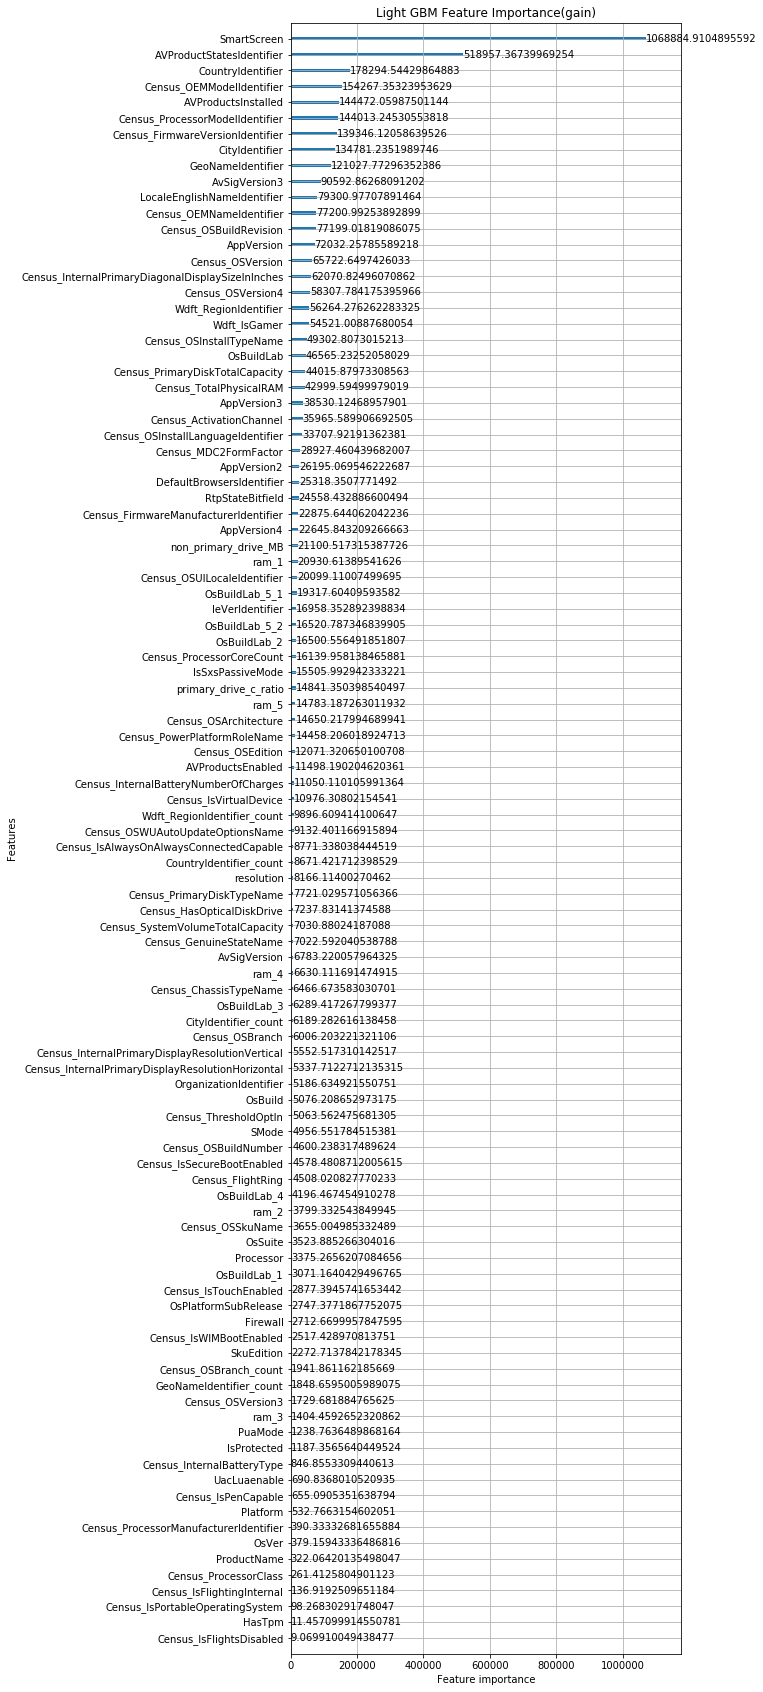

In [106]:
# feature importance
f, ax = plt.subplots(figsize=[7, 30])
lgb.plot_importance(clf, max_num_features=300, ax=ax, importance_type='gain')
plt.title("Light GBM Feature Importance(gain)")

In [189]:
#データ読みこみ
with open('/home/um003580/input/train.csv.pkl','rb') as f:
  train_fe = pickle.load(f)
with open('/home/um003580/input/test.csv.pkl','rb') as f:
  test_fe = pickle.load(f)

In [168]:
for df in [train_fe, test_fe]:
    df['SmartScreen'].replace({
#         '&#x01;':'Warn', 
        '&#x02;': 'Block', 
#         '0':'Off', '00000000':'Off',
#         'Deny':'Off', 'Enabled':'On',
        'BLOCK':'Block',
        'of':'Off', 'off':'Off', 'OFF':'Off',
        'on':'On', 'ON':'On', 'Promprt':'Prompt',
        'prompt':'Prompt', 'Promt':'Prompt', 'requireadmin':'RequireAdmin',
        'requireAdmin':'RequireAdmin', 'RequiredAdmin':'RequireAdmin','warn':'Warn'}
        , inplace=True)
    df.SmartScreen.fillna('unknown',inplace=True)

In [169]:
num_train = len(train_fe)
usecols = [x for x in train_fe.columns if x not in ['HasDetections']]
concat_df = pd.concat([train_fe[usecols],test_fe[usecols]])

In [170]:
# del train_count, test_count

In [171]:
usecols = ['SmartScreen']
#            , ['Census_OSArchitecture','OsPlatformSubRelease']]
for i, usecol in enumerate(usecols):
    print(i, usecol)
    agg = concat_df.groupby([usecol]).aggregate({'MachineIdentifier':'count'}).reset_index().rename({'MachineIdentifier': str(usecol)+'_count'}, axis=1)
    concat_df = pd.merge(concat_df, agg, on=usecol, how='left')
del agg
gc.collect()

0 SmartScreen


146

In [172]:
concat_df.head()

MachineIdentifier   ProductName EngineVersion       AppVersion  \
0                  0  win8defender   1.1.15100.1  4.18.1807.18075   
1                  1  win8defender   1.1.14600.4     4.13.17134.1   
2                  2  win8defender   1.1.15100.1  4.18.1807.18075   
3                  3  win8defender   1.1.15100.1  4.18.1807.18075   
4                  4  win8defender   1.1.15100.1  4.18.1807.18075   

   AvSigVersion  IsBeta  RtpStateBitfield  IsSxsPassiveMode  \
0  1.273.1735.0       0               7.0                 0   
1    1.263.48.0       0               7.0                 0   
2  1.273.1341.0       0               7.0                 0   
3  1.273.1527.0       0               7.0                 0   
4  1.273.1379.0       0               7.0                 0   

   DefaultBrowsersIdentifier  AVProductStatesIdentifier        ...         \
0                        NaN                    53447.0        ...          
1                        NaN                    53447.0        ...          
2                        NaN                    53447.0        ...          
3                        NaN                    53447.0        ...          
4                        NaN                    53447.0        ...          

   Census_FirmwareVersionIdentifier  Census_IsSecureBootEnabled  \
0                           36144.0                           0   
1                           57858.0                           0   
2                           52682.0                           0   
3                           20050.0                           0   
4                           19844.0                           0   

   Census_IsWIMBootEnabled  Census_IsVirtualDevice  Census_IsTouchEnabled  \
0                      NaN                     0.0                      0   
1                      NaN                     0.0                      0   
2                      NaN                     0.0                      0   
3                      NaN                     0.0                      0   
4                      0.0                     0.0                      0   

   Census_IsPenCapable  Census_IsAlwaysOnAlwaysConnectedCapable  Wdft_IsGamer  \
0                    0                                      0.0           0.0   
1                    0                                      0.0           0.0   
2                    0                                      0.0           0.0   
3                    0                                      0.0           0.0   
4                    0                                      0.0           0.0   

  Wdft_RegionIdentifier SmartScreen_count  
0                  10.0           6675413  
1                   8.0           6675413  
2                   3.0           7729765  
3                   3.0           1646629  
4                   1.0           7729765  

[5 rows x 83 columns]

In [173]:
train_fe = concat_df[:num_train]
test_fe = concat_df[num_train:]
del concat_df

In [116]:
# train_fe.rename(columns={'col<built-in function id>_x':'SmartScreen_count', 'col<built-in function id>_y':'Census_OSArchitecture_OsPlatformSubRelease_count'}, inplace=True)

In [118]:
# test_fe.rename(columns={'col<built-in function id>_x':'SmartScreen_count', 'col<built-in function id>_y':'Census_OSArchitecture_OsPlatformSubRelease_count'}, inplace=True)

In [174]:
usecols = ['MachineIdentifier','SmartScreen_count']
#            ,'Census_OSArchitecture_OsPlatformSubRelease_count']

In [121]:
# train['MachineIdentifier'] = train.indexb
# test['MachineIdentifier'] = test.index

In [ ]:
# del train['SmartScreen_x'],train['SmartScreen_y']

In [175]:
train.head()

ProductName EngineVersion AppVersion AvSigVersion IsBeta RtpStateBitfield  \
0           5             0          0            0      1                7   
1           5            57         30         6465      1                7   
2           5             0          0            0      1                7   
3           5             0          0            0      1                7   
4           5             0          0            0      1                7   

  IsSxsPassiveMode DefaultBrowsersIdentifier AVProductStatesIdentifier  \
0                1                      2610                     26978   
1                1                      2610                     26978   
2                1                      2610                     26978   
3                1                      2610                     26978   
4                1                      2610                     26978   

  AVProductsInstalled                       ...                         \
0                   2                       ...                          
1                   2                       ...                          
2                   2                       ...                          
3                   2                       ...                          
4                   2                       ...                          

  non_primary_drive_MB resolution     ram_1     ram_2   ram_3     ram_4  \
0             177489.0  1296000.0  0.003160  0.008588  1024.0  0.013678   
1             374555.0  1049088.0  0.003904  0.008588  1024.0  0.040006   
2                566.0  2073600.0  0.001975  0.035781  1024.0  0.035959   
3              11359.0  1049088.0  0.003904  0.017176  1024.0  0.018035   
4             375040.0  1049088.0  0.005857  0.012882  1536.0  0.060294   

        ram_5 MachineIdentifier SmartScreen_count_y  \
0  216.719574                 0                 NaN   
1  294.676270                 1                 NaN   
2  190.511627                 2           7729743.0   
3  221.405411                 3           1646629.0   
4  438.857147                 4           7729743.0   

  Census_OSArchitecture_OsPlatformSubRelease_count  
0                                          7288368  
1                                          7288368  
2                                          7288368  
3                                          7288368  
4                                          7288368  

[5 rows x 209 columns]

In [176]:
train = pd.merge(train, train_fe[usecols], on='MachineIdentifier', how='left')
test = pd.merge(test, test_fe[usecols], on='MachineIdentifier', how='left')

In [177]:
train.head()

ProductName EngineVersion AppVersion AvSigVersion IsBeta RtpStateBitfield  \
0           5             0          0            0      1                7   
1           5            57         30         6465      1                7   
2           5             0          0            0      1                7   
3           5             0          0            0      1                7   
4           5             0          0            0      1                7   

  IsSxsPassiveMode DefaultBrowsersIdentifier AVProductStatesIdentifier  \
0                1                      2610                     26978   
1                1                      2610                     26978   
2                1                      2610                     26978   
3                1                      2610                     26978   
4                1                      2610                     26978   

  AVProductsInstalled        ...        resolution     ram_1     ram_2  \
0                   2        ...         1296000.0  0.003160  0.008588   
1                   2        ...         1049088.0  0.003904  0.008588   
2                   2        ...         2073600.0  0.001975  0.035781   
3                   2        ...         1049088.0  0.003904  0.017176   
4                   2        ...         1049088.0  0.005857  0.012882   

    ram_3     ram_4       ram_5 MachineIdentifier SmartScreen_count_y  \
0  1024.0  0.013678  216.719574                 0                 NaN   
1  1024.0  0.040006  294.676270                 1                 NaN   
2  1024.0  0.035959  190.511627                 2           7729743.0   
3  1024.0  0.018035  221.405411                 3           1646629.0   
4  1536.0  0.060294  438.857147                 4           7729743.0   

  Census_OSArchitecture_OsPlatformSubRelease_count SmartScreen_count  
0                                          7288368           6675413  
1                                          7288368           6675413  
2                                          7288368           7729765  
3                                          7288368           1646629  
4                                          7288368           7729765  

[5 rows x 210 columns]

In [179]:
# del cols[-1:]
cols.remove('Census_OSArchitecture_OsPlatformSubRelease_count')

In [180]:
# cols.append('Census_FirmwareVersionIdentifier')
cols.append('SmartScreen_count')

In [181]:
cols

['ProductName',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'IsBeta',
 'RtpStateBitfield',
 'IsSxsPassiveMode',
 'DefaultBrowsersIdentifier',
 'AVProductsInstalled',
 'AVProductsEnabled',
 'HasTpm',
 'CountryIdentifier',
 'CityIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'Platform',
 'Processor',
 'OsVer',
 'OsBuild',
 'OsSuite',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'IsProtected',
 'AutoSampleOptIn',
 'PuaMode',
 'SMode',
 'IeVerIdentifier',
 'SmartScreen',
 'Firewall',
 'UacLuaenable',
 'Census_MDC2FormFactor',
 'Census_DeviceFamily',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_ProcessorClass',
 'Census_PrimaryDiskTotalCapacity',
 'Census_PrimaryDiskTypeName',
 'Census_SystemVolumeTotalCapacity',
 'Census_HasOpticalDiskDrive',
 'Census_TotalPhysicalRAM',
 'Census_ChassisTypeName',
 'Census_InternalPrimaryDiagon

In [182]:
X_val = train.loc[train_index]
y_val = X_val['HasDetections']
del X_val['HasDetections']
X_fit = train.loc[valid_index]
y_fit = X_fit['HasDetections']
del X_fit['HasDetections']

In [147]:
# add Census_OSArchitecture_OsPlatformSubRelease_count
param = {
    'max_depth': -1,
#     'n_estimatodrs': 30000,
    'learning_rate': 0.1,
    'colsample_bytree': 0.2,
    'objective': 'binary',
    'n_jobs': -1,
    'importance_type': 'gain',
#     "metric": 'auc'
    'metric': 'None'
}
trn_data = lgb.Dataset(X_fit[cols],
                       label=y_fit,
#                        categorical_feature = categorical_feature
                      )
val_data = lgb.Dataset(X_val[cols],
                       label=y_val,
#                        categorical_feature = categorical_feature
                      )

num_round = 10000
clf = lgb.train(param,
                trn_data,
                num_round,
                valid_sets = [val_data],
                verbose_eval = 20,
                early_stopping_rounds = 100,
                feval=eval_auc)

Training until validation scores don't improve for 100 rounds.
[20]	valid_0's auc: 0.689099
[40]	valid_0's auc: 0.69987
[60]	valid_0's auc: 0.704223
[80]	valid_0's auc: 0.706682
[100]	valid_0's auc: 0.709106
[120]	valid_0's auc: 0.709696
[140]	valid_0's auc: 0.710462
[160]	valid_0's auc: 0.710384
[180]	valid_0's auc: 0.710965
[200]	valid_0's auc: 0.711154
[220]	valid_0's auc: 0.710732
[240]	valid_0's auc: 0.711129
[260]	valid_0's auc: 0.711249
[280]	valid_0's auc: 0.711072
[300]	valid_0's auc: 0.711373
[320]	valid_0's auc: 0.711645
[340]	valid_0's auc: 0.711995
[360]	valid_0's auc: 0.711971
[380]	valid_0's auc: 0.711874
[400]	valid_0's auc: 0.712053
[420]	valid_0's auc: 0.711963
[440]	valid_0's auc: 0.71204
[460]	valid_0's auc: 0.712054
[480]	valid_0's auc: 0.712073
[500]	valid_0's auc: 0.712112
[520]	valid_0's auc: 0.712271
[540]	valid_0's auc: 0.712292
[560]	valid_0's auc: 0.712282
[580]	valid_0's auc: 0.712355
[600]	valid_0's auc: 0.712452
[620]	valid_0's auc: 0.712558
[640]	valid_0

Text(0.5, 1.0, 'Light GBM Feature Importance(gain)')

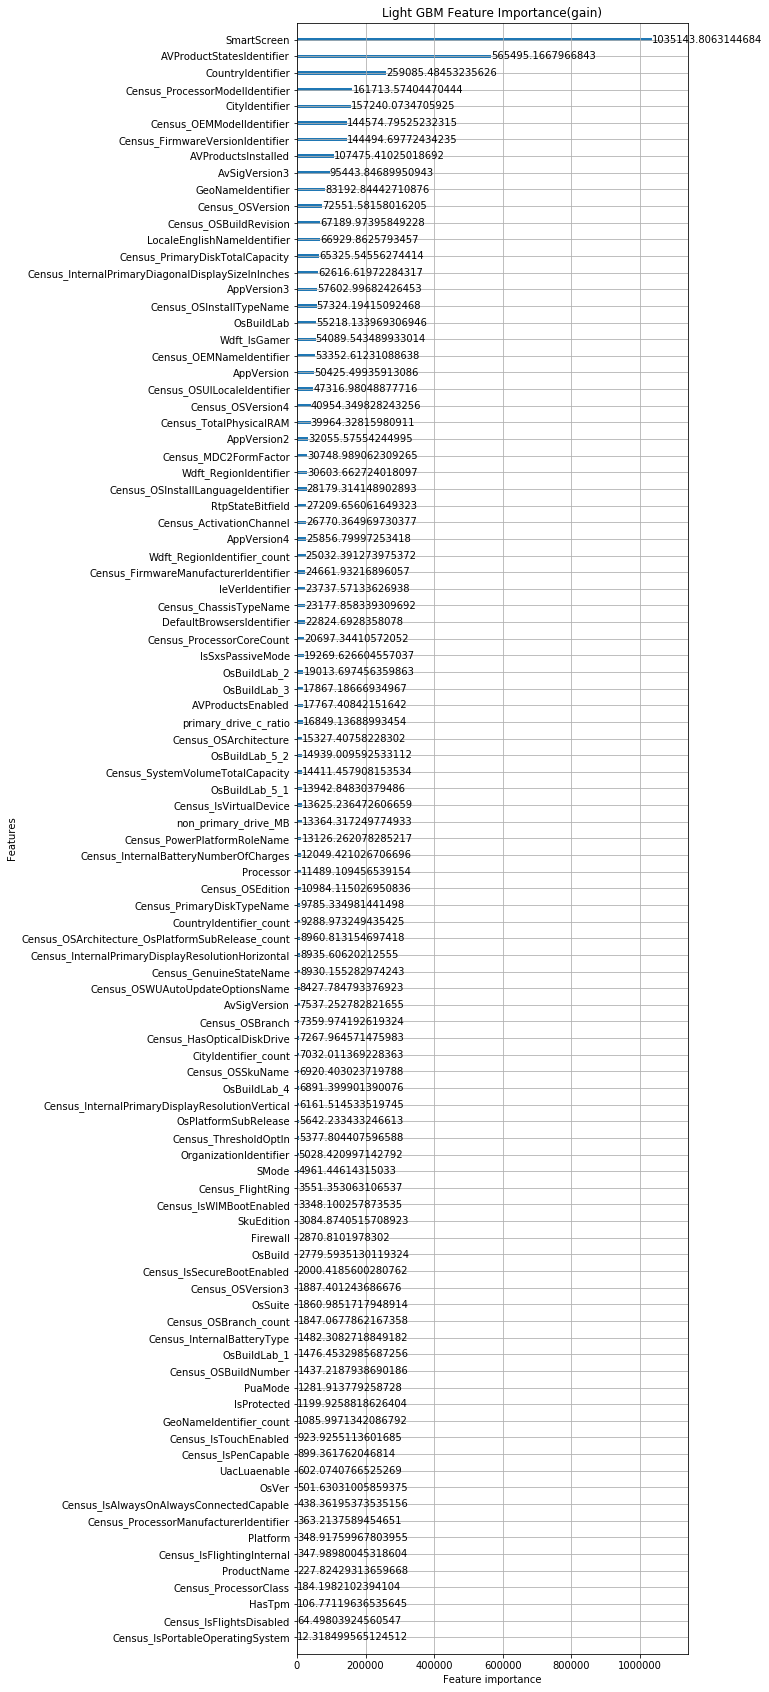

In [148]:
# feature importance
f, ax = plt.subplots(figsize=[7, 30])
lgb.plot_importance(clf, max_num_features=300, ax=ax, importance_type='gain')
plt.title("Light GBM Feature Importance(gain)")

In [187]:
# add SmartScreen_count
param = {
    'max_depth': -1,
#     'n_estimatodrs': 30000,
    'learning_rate': 0.1,
    'colsample_bytree': 0.2,
    'objective': 'binary',
    'n_jobs': -1,
    'importance_type': 'gain',
#     "metric": 'auc'
    'metric': 'None'
}
trn_data = lgb.Dataset(X_fit[cols],
                       label=y_fit,
#                        categorical_feature = categorical_feature
                      )
val_data = lgb.Dataset(X_val[cols],
                       label=y_val,
#                        categorical_feature = categorical_feature
                      )

num_round = 10000
clf = lgb.train(param,
                trn_data,
                num_round,
                valid_sets = [val_data],
                verbose_eval = 20,
                early_stopping_rounds = 100,
                feval=eval_auc)

Training until validation scores don't improve for 100 rounds.
[20]	valid_0's auc: 0.690831
[40]	valid_0's auc: 0.700287
[60]	valid_0's auc: 0.704177
[80]	valid_0's auc: 0.706069
[100]	valid_0's auc: 0.708351
[120]	valid_0's auc: 0.709276
[140]	valid_0's auc: 0.710037
[160]	valid_0's auc: 0.709913
[180]	valid_0's auc: 0.710286
[200]	valid_0's auc: 0.710857
[220]	valid_0's auc: 0.710582
[240]	valid_0's auc: 0.710997
[260]	valid_0's auc: 0.711163
[280]	valid_0's auc: 0.711483
[300]	valid_0's auc: 0.711493
[320]	valid_0's auc: 0.711632
[340]	valid_0's auc: 0.711748
[360]	valid_0's auc: 0.711742
[380]	valid_0's auc: 0.711914
[400]	valid_0's auc: 0.71199
[420]	valid_0's auc: 0.712059
[440]	valid_0's auc: 0.712028
[460]	valid_0's auc: 0.712078
[480]	valid_0's auc: 0.712261
[500]	valid_0's auc: 0.712417
[520]	valid_0's auc: 0.712476
[540]	valid_0's auc: 0.712428
[560]	valid_0's auc: 0.712392
[580]	valid_0's auc: 0.712479
[600]	valid_0's auc: 0.712549
[620]	valid_0's auc: 0.712597
[640]	valid_

Text(0.5, 1.0, 'Light GBM Feature Importance(gain)')

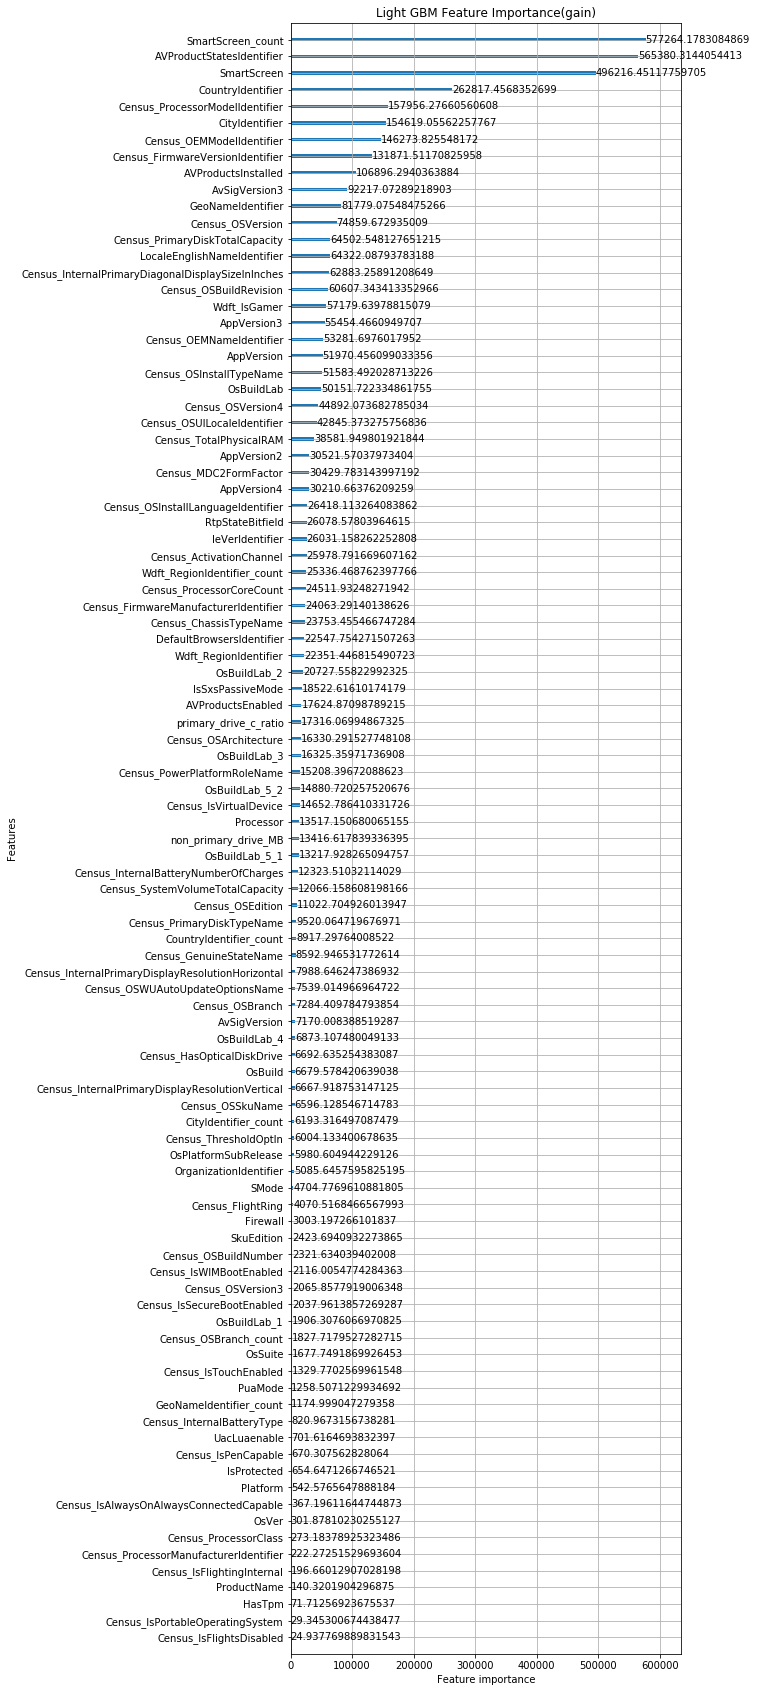

In [188]:
# feature importance
f, ax = plt.subplots(figsize=[7, 30])
lgb.plot_importance(clf, max_num_features=300, ax=ax, importance_type='gain')
plt.title("Light GBM Feature Importance(gain)")

In [190]:
# train.groupby(['AvSigVersion'])['AvSigVersion'].count()
if 5244810 in train_fe.index:
    train_fe.loc[5244810,'AvSigVersion'] = '1.273.1144.0'
#     train['AvSigVersion'].cat.remove_categories('1.2&#x17;3.1144.0',inplace=True)
# train['AvSigVersion2'] = train['AvSigVersion'].map(lambda x: np.int(x.split('.')[1]))

In [191]:
def fe(df):
#     df['EngineVersion1'] = df['EngineVersion'].map(lambda x: np.int(x.split('.')[0]))
#     df['EngineVersion2'] = df['EngineVersion'].map(lambda x: np.int(x.split('.')[1]))
#     df['EngineVersion3'] = df['EngineVersion'].map(lambda x: np.int(x.split('.')[2]))
#     df['EngineVersion4'] = df['EngineVersion'].map(lambda x: np.int(x.split('.')[3]))

#     df['AppVersion1'] = df['AppVersion'].map(lambda x: np.int(x.split('.')[0]))
#     df['AppVersion2'] = df['AppVersion'].map(lambda x: np.int(x.split('.')[1]))
#     df['AppVersion3'] = df['AppVersion'].map(lambda x: np.int(x.split('.')[2]))
#     df['AppVersion4'] = df['AppVersion'].map(lambda x: np.int(x.split('.')[3]))
    
    df['AvSigVersion1'] = df['AvSigVersion'].map(lambda x: np.int(x.split('.')[0]))
    df['AvSigVersion2'] = df['AvSigVersion'].map(lambda x: np.int(x.split('.')[1]))
    df['AvSigVersion3'] = df['AvSigVersion'].map(lambda x: np.int(x.split('.')[2]))
#     df['AvSigVersion4'] = df['AvSigVersion'].map(lambda x: np.int(x.split('.')[3]))
    
#     df['Census_OSVersion1'] = df['Census_OSVersion'].map(lambda x: np.int(x.split('.')[0]))
#     df['Census_OSVersion2'] = df['Census_OSVersion'].map(lambda x: np.int(x.split('.')[1]))
#     df['Census_OSVersion3'] = df['Census_OSVersion'].map(lambda x: np.int(x.split('.')[2]))
#     df['Census_OSVersion4'] = df['Census_OSVersion'].map(lambda x: np.int(x.split('.')[3]))

    return df

#     df['OsBuildLab_0'] = df['OsBuildLab'].apply(lambda x: x.split('.')[0]).astype('category')
#     df['OsBuildLab_1'] = df['OsBuildLab'].apply(lambda x: x.split('.')[1]).astype('category')
#     df['OsBuildLab_2'] = df['OsBuildLab'].apply(lambda x: x.split('.')[2]).astype('category')
#     df['OsBuildLab_3'] = df['OsBuildLab'].apply(lambda x: x.split('.')[3]).astype('category')
    # df['OsBuildLab_40'] = df['OsBuildLab'].apply(lambda x: x.split('.')[-1].split('-')[0]).astype('category')
    # df['OsBuildLab_41'] = df['OsBuildLab'].apply(lambda x: x.split('.')[-1].split('-')[1]).astype('category')

In [192]:
train_fe = fe(train_fe)
test_fe = fe(test_fe)

In [202]:
train_fe.head()

MachineIdentifier   ProductName EngineVersion       AppVersion  \
0                  0  win8defender   1.1.15100.1  4.18.1807.18075   
1                  1  win8defender   1.1.14600.4     4.13.17134.1   
2                  2  win8defender   1.1.15100.1  4.18.1807.18075   
3                  3  win8defender   1.1.15100.1  4.18.1807.18075   
4                  4  win8defender   1.1.15100.1  4.18.1807.18075   

   AvSigVersion  IsBeta  RtpStateBitfield  IsSxsPassiveMode  \
0  1.273.1735.0       0               7.0                 0   
1    1.263.48.0       0               7.0                 0   
2  1.273.1341.0       0               7.0                 0   
3  1.273.1527.0       0               7.0                 0   
4  1.273.1379.0       0               7.0                 0   

   DefaultBrowsersIdentifier  AVProductStatesIdentifier      ...       \
0                        NaN                    53447.0      ...        
1                        NaN                    53447.0      ...        
2                        NaN                    53447.0      ...        
3                        NaN                    53447.0      ...        
4                        NaN                    53447.0      ...        

   Census_IsVirtualDevice  Census_IsTouchEnabled  Census_IsPenCapable  \
0                     0.0                      0                    0   
1                     0.0                      0                    0   
2                     0.0                      0                    0   
3                     0.0                      0                    0   
4                     0.0                      0                    0   

   Census_IsAlwaysOnAlwaysConnectedCapable  Wdft_IsGamer  \
0                                      0.0           0.0   
1                                      0.0           0.0   
2                                      0.0           0.0   
3                                      0.0           0.0   
4                                      0.0           0.0   

   Wdft_RegionIdentifier  HasDetections  AvSigVersion1 AvSigVersion2  \
0                   10.0            0.0              1           273   
1                    8.0            0.0              1           263   
2                    3.0            0.0              1           273   
3                    3.0            1.0              1           273   
4                    1.0            1.0              1           273   

  AvSigVersion3  
0          1735  
1            48  
2          1341  
3          1527  
4          1379  

[5 rows x 86 columns]

In [199]:
train_fe.groupby(['AvSigVersion2'])['MachineIdentifier'].count()

AvSigVersion2
0           68
155         10
167          3
169          5
177          1
187          1
189          1
193          6
195          8
197          9
199         86
201          4
203         13
205          7
207         73
209          6
211          3
213         36
215         15
217         19
219         19
221        764
223       1862
225       5590
227       3896
229       4271
231       4692
233       9339
235       8826
237      70628
239       7188
241       4962
243       4964
245       9488
247       9753
249      14581
251      94182
253      15612
255       5029
257      24257
259      36396
261      48790
263     160659
265      47509
267     138899
269     214502
271     269369
273    3724335
275    3901028
277      79719
Name: MachineIdentifier, dtype: int64

In [200]:
train['AvSigVersion2_int'] = train_fe['AvSigVersion2']
test['AvSigVersion2_int'] = test_fe['AvSigVersion2']

In [201]:
train.head()

ProductName EngineVersion AppVersion AvSigVersion IsBeta RtpStateBitfield  \
0           5             0          0            0      1                7   
1           5            57         30         6465      1                7   
2           5             0          0            0      1                7   
3           5             0          0            0      1                7   
4           5             0          0            0      1                7   

  IsSxsPassiveMode DefaultBrowsersIdentifier AVProductStatesIdentifier  \
0                1                      2610                     26978   
1                1                      2610                     26978   
2                1                      2610                     26978   
3                1                      2610                     26978   
4                1                      2610                     26978   

  AVProductsInstalled        ...            ram_1     ram_2   ram_3     ram_4  \
0                   2        ...         0.003160  0.008588  1024.0  0.013678   
1                   2        ...         0.003904  0.008588  1024.0  0.040006   
2                   2        ...         0.001975  0.035781  1024.0  0.035959   
3                   2        ...         0.003904  0.017176  1024.0  0.018035   
4                   2        ...         0.005857  0.012882  1536.0  0.060294   

        ram_5 MachineIdentifier SmartScreen_count_y  \
0  216.719574                 0                 NaN   
1  294.676270                 1                 NaN   
2  190.511627                 2           7729743.0   
3  221.405411                 3           1646629.0   
4  438.857147                 4           7729743.0   

  Census_OSArchitecture_OsPlatformSubRelease_count SmartScreen_count  \
0                                          7288368           6675413   
1                                          7288368           6675413   
2                                          7288368           7729765   
3                                          7288368           1646629   
4                                          7288368           7729765   

  AvSigVersion2_int  
0               273  
1               263  
2               273  
3               273  
4               273  

[5 rows x 211 columns]

In [204]:
cols.remove('SmartScreen_count')
cols.append('AvSigVersion2_int')

In [205]:
# del train['MachineIdentifier'], test['MachineIdentifier']
X_val = train.loc[train_index]
y_val = X_val['HasDetections']
del X_val['HasDetections']
X_fit = train.loc[valid_index]
y_fit = X_fit['HasDetections']
del X_fit['HasDetections']
gc.collect()

82

In [206]:
# add avsigversion2_int
param = {
    'max_depth': -1,
#     'n_estimatodrs': 30000,
    'learning_rate': 0.1,
    'colsample_bytree': 0.2,
    'objective': 'binary',
    'n_jobs': -1,
    'importance_type': 'gain',
#     "metric": 'auc'
    'metric': 'None'
}
trn_data = lgb.Dataset(X_fit[cols],
                       label=y_fit,
#                        categorical_feature = categorical_feature
                      )
val_data = lgb.Dataset(X_val[cols],
                       label=y_val,
#                        categorical_feature = categorical_feature
                      )

num_round = 10000
clf = lgb.train(param,
                trn_data,
                num_round,
                valid_sets = [val_data],
                verbose_eval = 20,
                early_stopping_rounds = 100,
                feval=eval_auc)

Training until validation scores don't improve for 100 rounds.
[20]	valid_0's auc: 0.689076
[40]	valid_0's auc: 0.699824
[60]	valid_0's auc: 0.704265
[80]	valid_0's auc: 0.706544
[100]	valid_0's auc: 0.708628
[120]	valid_0's auc: 0.709237
[140]	valid_0's auc: 0.709872
[160]	valid_0's auc: 0.709979
[180]	valid_0's auc: 0.71016
[200]	valid_0's auc: 0.710592
[220]	valid_0's auc: 0.71041
[240]	valid_0's auc: 0.710628
[260]	valid_0's auc: 0.710914
[280]	valid_0's auc: 0.710922
[300]	valid_0's auc: 0.711201
[320]	valid_0's auc: 0.711424
[340]	valid_0's auc: 0.711721
[360]	valid_0's auc: 0.711776
[380]	valid_0's auc: 0.711948
[400]	valid_0's auc: 0.71209
[420]	valid_0's auc: 0.711954
[440]	valid_0's auc: 0.712034
[460]	valid_0's auc: 0.712118
[480]	valid_0's auc: 0.71221
[500]	valid_0's auc: 0.712307
[520]	valid_0's auc: 0.712415
[540]	valid_0's auc: 0.712475
[560]	valid_0's auc: 0.712395
[580]	valid_0's auc: 0.712425
[600]	valid_0's auc: 0.712542
[620]	valid_0's auc: 0.712687
[640]	valid_0's

Text(0.5, 1.0, 'Light GBM Feature Importance(gain)')

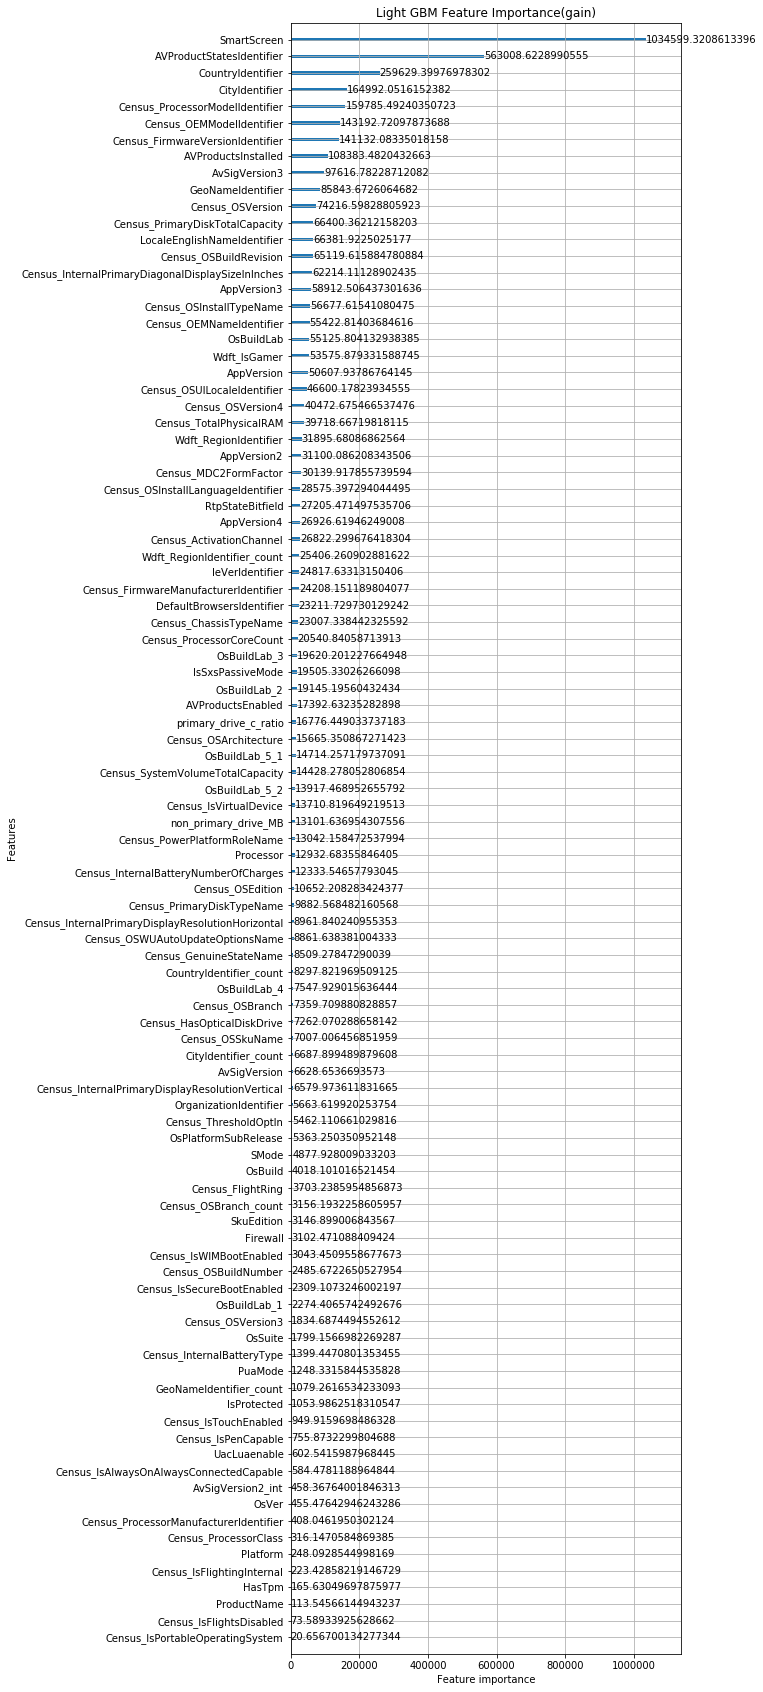

In [207]:
# feature importance
f, ax = plt.subplots(figsize=[7, 30])
lgb.plot_importance(clf, max_num_features=300, ax=ax, importance_type='gain')
plt.title("Light GBM Feature Importance(gain)")

In [208]:
cols

['ProductName',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'IsBeta',
 'RtpStateBitfield',
 'IsSxsPassiveMode',
 'DefaultBrowsersIdentifier',
 'AVProductsInstalled',
 'AVProductsEnabled',
 'HasTpm',
 'CountryIdentifier',
 'CityIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'Platform',
 'Processor',
 'OsVer',
 'OsBuild',
 'OsSuite',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'IsProtected',
 'AutoSampleOptIn',
 'PuaMode',
 'SMode',
 'IeVerIdentifier',
 'SmartScreen',
 'Firewall',
 'UacLuaenable',
 'Census_MDC2FormFactor',
 'Census_DeviceFamily',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_ProcessorClass',
 'Census_PrimaryDiskTotalCapacity',
 'Census_PrimaryDiskTypeName',
 'Census_SystemVolumeTotalCapacity',
 'Census_HasOpticalDiskDrive',
 'Census_TotalPhysicalRAM',
 'Census_ChassisTypeName',
 'Census_InternalPrimaryDiagon

In [210]:
cols.remove('AvSigVersion2_int')
cols.remove('CityIdentifier_count')
cols.remove('GeoNameIdentifier_count')
cols.remove('non_primary_drive_MB')
cols.remove('primary_drive_c_ratio')